<p style="text-align:center;">
<span style="font-size:40px;">
<span style="color:green;">
<b> Birth Rate
    </b>
    </span>
    </span>
    </p>

<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:#097969;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:30px;"> Data Cleaning
    </span>
    </p>
    </div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplt
import plotly.express as px
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from tabulate import tabulate


In [2]:
#View data
df = pd.read_excel("Birth Rate Dataset for Multiple Linear Regression Analysis.xlsx")
df

,Continent,Year,Population - Sex: all - Age: all - Variant: estimates,Birth rate - Sex: all - Age: all - Variant: estimates,Death rate - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,population Growth rate - Sex: all - Age: all - Variant: estimates,Youth dependency ratio - Sex: all - Age: none - Variant: estimates
0,Africa (UN),1950,227549260,48.102,26.636,6.5856,2.14,75.32
1,Africa (UN),1951,232484000,48.163,26.370,6.5921,2.16,75.52
2,Africa (UN),1952,237586060,48.167,25.896,6.5957,2.19,75.79
3,Africa (UN),1953,242837440,48.185,25.467,6.6072,2.19,76.18
4,Africa (UN),1954,248244770,48.075,25.096,6.6096,2.22,76.68
...,...,...,...,...,...,...,...,...
499,World,2017,7599822300,18.767,7.496,2.5042,1.13,40.26
500,World,2018,7683790000,18.174,7.465,2.4433,1.07,40.08
501,World,2019,7764951000,17.771,7.462,2.4062,1.03,39.86
502,World,2020,7840953000,17.237,8.058,2.3485,0.92,39.58


In [3]:
# Cheack for missing value
missing_value = df.isnull()
num_of_missing_value = missing_value.sum()
print(missing_value)
print(num_of_missing_value)

     Continent   Year  Population - Sex: all - Age: all - Variant: estimates  \
0        False  False                                              False       
1        False  False                                              False       
2        False  False                                              False       
3        False  False                                              False       
4        False  False                                              False       
..         ...    ...                                                ...       
499      False  False                                              False       
500      False  False                                              False       
501      False  False                                              False       
502      False  False                                              False       
503      False  False                                              False       

     Birth rate - Sex: all - Age: all -

In [4]:
#cheack for Outliers

# Calculate the IQR for each column in the DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Identify potential outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
# Print the outliers for each column
for column in df.columns:
    column_outliers = outliers[column]
    print(f"Outliers in column '{column}':")
    print(df[column][column_outliers])
    print()


Outliers in column 'Continent':
Series([], Name: Continent, dtype: object)

Outliers in column 'Year':
Series([], Name: Year, dtype: int64)

Outliers in column 'Population - Sex: all - Age: all - Variant: estimates':
142    4664324000
143    4694576000
465    4691884000
466    4775836000
467    4861731000
468    4950063000
469    5040984600
470    5132294000
471    5223704000
472    5316176000
473    5406246000
474    5492686300
475    5577433600
476    5660728000
477    5743219700
478    5825145300
479    5906481000
480    5987312600
481    6067758600
482    6148899000
483    6230747000
484    6312407600
485    6393898500
486    6475751400
487    6558176000
488    6641416000
489    6725948400
490    6811597300
491    6898306000
492    6985603000
493    7073125400
494    7161698000
495    7250593300
496    7339013600
497    7426597400
498    7513474000
499    7599822300
500    7683790000
501    7764951000
502    7840953000
503    7909295000
Name: Population - Sex: all - Age: all - Vari

<ipython-input-4-4b15fda41a38>:8: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

<ipython-input-4-4b15fda41a38>:8: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [5]:
# Check for duplicate
duplicate_rows = df.duplicated()
print(df[duplicate_rows])


Empty DataFrame
Columns: [Continent, Year, Population - Sex: all - Age: all - Variant: estimates, Birth rate - Sex: all - Age: all - Variant: estimates, Death rate - Sex: all - Age: all - Variant: estimates, Fertility rate - Sex: all - Age: all - Variant: estimates, population Growth rate - Sex: all - Age: all - Variant: estimates, Youth dependency ratio - Sex: all - Age: none - Variant: estimates]
Index: []


In [6]:
#data type
df.dtypes

Continent                                                              object
Year                                                                    int64
Population - Sex: all - Age: all - Variant: estimates                   int64
Birth rate - Sex: all - Age: all - Variant: estimates                 float64
Death rate - Sex: all - Age: all - Variant: estimates                 float64
Fertility rate - Sex: all - Age: all - Variant: estimates             float64
population Growth rate - Sex: all - Age: all - Variant: estimates     float64
Youth dependency ratio - Sex: all - Age: none - Variant: estimates    float64
dtype: object

In [7]:
print('df:', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Continent                                                           504 non-null    object 
 1   Year                                                                504 non-null    int64  
 2   Population - Sex: all - Age: all - Variant: estimates               504 non-null    int64  
 3   Birth rate - Sex: all - Age: all - Variant: estimates               504 non-null    float64
 4   Death rate - Sex: all - Age: all - Variant: estimates               504 non-null    float64
 5   Fertility rate - Sex: all - Age: all - Variant: estimates           504 non-null    float64
 6   population Growth rate - Sex: all - Age: all - Variant: estimates   504 non-null    float64
 7   Youth dependency r

<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:#097969;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:30px;"> Descriptive statistics
    </span>
    </p>
    </div>


In [8]:
df.head()

,Continent,Year,Population - Sex: all - Age: all - Variant: estimates,Birth rate - Sex: all - Age: all - Variant: estimates,Death rate - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,population Growth rate - Sex: all - Age: all - Variant: estimates,Youth dependency ratio - Sex: all - Age: none - Variant: estimates
0,Africa (UN),1950,227549260,48.102,26.636,6.5856,2.14,75.32
1,Africa (UN),1951,232484000,48.163,26.370,6.5921,2.16,75.52
2,Africa (UN),1952,237586060,48.167,25.896,6.5957,2.19,75.79
3,Africa (UN),1953,242837440,48.185,25.467,6.6072,2.19,76.18
4,Africa (UN),1954,248244770,48.075,25.096,6.6096,2.22,76.68


In [9]:
print("df", df.shape)

df (504, 8)


In [10]:
df.columns

Index(['Continent', 'Year',
       'Population - Sex: all - Age: all - Variant: estimates',
       'Birth rate - Sex: all - Age: all - Variant: estimates',
       'Death rate - Sex: all - Age: all - Variant: estimates',
       'Fertility rate - Sex: all - Age: all - Variant: estimates',
       'population Growth rate - Sex: all - Age: all - Variant: estimates',
       'Youth dependency ratio - Sex: all - Age: none - Variant: estimates'],
      dtype='object')

In [11]:
df.dtypes

Continent                                                              object
Year                                                                    int64
Population - Sex: all - Age: all - Variant: estimates                   int64
Birth rate - Sex: all - Age: all - Variant: estimates                 float64
Death rate - Sex: all - Age: all - Variant: estimates                 float64
Fertility rate - Sex: all - Age: all - Variant: estimates             float64
population Growth rate - Sex: all - Age: all - Variant: estimates     float64
Youth dependency ratio - Sex: all - Age: none - Variant: estimates    float64
dtype: object

In [12]:
df.describe()

,Year,Population - Sex: all - Age: all - Variant: estimates,Birth rate - Sex: all - Age: all - Variant: estimates,Death rate - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,population Growth rate - Sex: all - Age: all - Variant: estimates,Youth dependency ratio - Sex: all - Age: none - Variant: estimates
count,504.000000,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000
mean,1985.500000,1.430998e+09,25.718585,10.761048,3.478874,1.598115,52.828433
std,20.803253,1.878723e+09,10.854681,4.237077,1.565186,0.739381,18.190812
min,1950.000000,1.257761e+07,9.241000,5.924000,1.401100,-0.180000,22.760000
25%,1967.750000,2.536895e+08,17.128250,7.946750,2.264675,1.070000,38.085000
50%,1985.500000,5.954246e+08,22.497000,9.503000,2.819700,1.630000,50.455000
75%,2003.250000,2.006989e+09,34.829000,11.785000,4.827150,2.202500,68.642500
max,2021.000000,7.909295e+09,48.185000,26.636000,6.716000,2.960000,86.340000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,504.0,1.985500e+03,2.080325e+01,1.950000e+03,1.967750e+03,1.985500e+03,2.003250e+03,2.021000e+03
Population - Sex: all - Age: all - Variant: estimates,504.0,1.430998e+09,1.878723e+09,1.257761e+07,2.536895e+08,5.954246e+08,2.006989e+09,7.909295e+09
Birth rate - Sex: all - Age: all - Variant: estimates,504.0,2.571859e+01,1.085468e+01,9.241000e+00,1.712825e+01,2.249700e+01,3.482900e+01,4.818500e+01
Death rate - Sex: all - Age: all - Variant: estimates,504.0,1.076105e+01,4.237077e+00,5.924000e+00,7.946750e+00,9.503000e+00,1.178500e+01,2.663600e+01
Fertility rate - Sex: all - Age: all - Variant: estimates,504.0,3.478874e+00,1.565186e+00,1.401100e+00,2.264675e+00,2.819700e+00,4.827150e+00,6.716000e+00
population Growth rate - Sex: all - Age: all - Variant: estimates,504.0,1.598115e+00,7.393809e-01,-1.800000e-01,1.070000e+00,1.630000e+00,2.202500e+00,2.960000e+00
Youth dependency ratio - Sex: all - Age: none - Variant: estimates,504.0,5.282843e+01,1.819081e+01,2.276000e+01,3.808500e+01,5.045500e+01,6.864250e+01,8.634000e+01


In [14]:
df.dtypes

Continent                                                              object
Year                                                                    int64
Population - Sex: all - Age: all - Variant: estimates                   int64
Birth rate - Sex: all - Age: all - Variant: estimates                 float64
Death rate - Sex: all - Age: all - Variant: estimates                 float64
Fertility rate - Sex: all - Age: all - Variant: estimates             float64
population Growth rate - Sex: all - Age: all - Variant: estimates     float64
Youth dependency ratio - Sex: all - Age: none - Variant: estimates    float64
dtype: object

In [15]:
# Convert the "Year" column to datetime without introducing the date components
df['Year'] = pd.to_datetime(df['Year'], format='%Y')


In [16]:
df.dtypes

Continent                                                                     object
Year                                                                  datetime64[ns]
Population - Sex: all - Age: all - Variant: estimates                          int64
Birth rate - Sex: all - Age: all - Variant: estimates                        float64
Death rate - Sex: all - Age: all - Variant: estimates                        float64
Fertility rate - Sex: all - Age: all - Variant: estimates                    float64
population Growth rate - Sex: all - Age: all - Variant: estimates            float64
Youth dependency ratio - Sex: all - Age: none - Variant: estimates           float64
dtype: object

In [17]:
df

,Continent,Year,Population - Sex: all - Age: all - Variant: estimates,Birth rate - Sex: all - Age: all - Variant: estimates,Death rate - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,population Growth rate - Sex: all - Age: all - Variant: estimates,Youth dependency ratio - Sex: all - Age: none - Variant: estimates
0,Africa (UN),1950-01-01,227549260,48.102,26.636,6.5856,2.14,75.32
1,Africa (UN),1951-01-01,232484000,48.163,26.370,6.5921,2.16,75.52
2,Africa (UN),1952-01-01,237586060,48.167,25.896,6.5957,2.19,75.79
3,Africa (UN),1953-01-01,242837440,48.185,25.467,6.6072,2.19,76.18
4,Africa (UN),1954-01-01,248244770,48.075,25.096,6.6096,2.22,76.68
...,...,...,...,...,...,...,...,...
499,World,2017-01-01,7599822300,18.767,7.496,2.5042,1.13,40.26
500,World,2018-01-01,7683790000,18.174,7.465,2.4433,1.07,40.08
501,World,2019-01-01,7764951000,17.771,7.462,2.4062,1.03,39.86
502,World,2020-01-01,7840953000,17.237,8.058,2.3485,0.92,39.58


In [18]:
# rearrnage columns
# Define the desired column order
desired_columns = ['Year', 'Continent', 'Population - Sex: all - Age: all - Variant: estimates', 
                   'Birth rate - Sex: all - Age: all - Variant: estimates', 'Death rate - Sex: all - Age: all - Variant: estimates', 
                   'Fertility rate - Sex: all - Age: all - Variant: estimates', 'population Growth rate - Sex: all - Age: all - Variant: estimates', 
                   'Youth dependency ratio - Sex: all - Age: none - Variant: estimates']

# Rearrange the columns in the DataFrame
df = df.reindex(columns=desired_columns)

# Print the updated DataFrame
print(df)

          Year    Continent  \
0   1950-01-01  Africa (UN)   
1   1951-01-01  Africa (UN)   
2   1952-01-01  Africa (UN)   
3   1953-01-01  Africa (UN)   
4   1954-01-01  Africa (UN)   
..         ...          ...   
499 2017-01-01        World   
500 2018-01-01        World   
501 2019-01-01        World   
502 2020-01-01        World   
503 2021-01-01        World   

     Population - Sex: all - Age: all - Variant: estimates  \
0                                            227549260       
1                                            232484000       
2                                            237586060       
3                                            242837440       
4                                            248244770       
..                                                 ...       
499                                         7599822300       
500                                         7683790000       
501                                         7764951000       
502    

In [19]:
df

,Year,Continent,Population - Sex: all - Age: all - Variant: estimates,Birth rate - Sex: all - Age: all - Variant: estimates,Death rate - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,population Growth rate - Sex: all - Age: all - Variant: estimates,Youth dependency ratio - Sex: all - Age: none - Variant: estimates
0,1950-01-01,Africa (UN),227549260,48.102,26.636,6.5856,2.14,75.32
1,1951-01-01,Africa (UN),232484000,48.163,26.370,6.5921,2.16,75.52
2,1952-01-01,Africa (UN),237586060,48.167,25.896,6.5957,2.19,75.79
3,1953-01-01,Africa (UN),242837440,48.185,25.467,6.6072,2.19,76.18
4,1954-01-01,Africa (UN),248244770,48.075,25.096,6.6096,2.22,76.68
...,...,...,...,...,...,...,...,...
499,2017-01-01,World,7599822300,18.767,7.496,2.5042,1.13,40.26
500,2018-01-01,World,7683790000,18.174,7.465,2.4433,1.07,40.08
501,2019-01-01,World,7764951000,17.771,7.462,2.4062,1.03,39.86
502,2020-01-01,World,7840953000,17.237,8.058,2.3485,0.92,39.58


In [20]:
df.dtypes

Year                                                                  datetime64[ns]
Continent                                                                     object
Population - Sex: all - Age: all - Variant: estimates                          int64
Birth rate - Sex: all - Age: all - Variant: estimates                        float64
Death rate - Sex: all - Age: all - Variant: estimates                        float64
Fertility rate - Sex: all - Age: all - Variant: estimates                    float64
population Growth rate - Sex: all - Age: all - Variant: estimates            float64
Youth dependency ratio - Sex: all - Age: none - Variant: estimates           float64
dtype: object

In [21]:
df.rename(columns = {'Population - Sex: all - Age: all - Variant: estimates' : 'Population', 
                         'Birth rate - Sex: all - Age: all - Variant: estimates' : 'Birth rate',
                         'Death rate - Sex: all - Age: all - Variant: estimates' : 'Death rate',
                         'Fertility rate - Sex: all - Age: all - Variant: estimates' : 'Fertility rate',
                         'population Growth rate - Sex: all - Age: all - Variant: estimates' : 'Population growth rate',
                         'Youth dependency ratio - Sex: all - Age: none - Variant: estimates' : 'Youth dependency ratio'}, inplace = True)



In [22]:
df

,Year,Continent,Population,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
0,1950-01-01,Africa (UN),227549260,48.102,26.636,6.5856,2.14,75.32
1,1951-01-01,Africa (UN),232484000,48.163,26.370,6.5921,2.16,75.52
2,1952-01-01,Africa (UN),237586060,48.167,25.896,6.5957,2.19,75.79
3,1953-01-01,Africa (UN),242837440,48.185,25.467,6.6072,2.19,76.18
4,1954-01-01,Africa (UN),248244770,48.075,25.096,6.6096,2.22,76.68
...,...,...,...,...,...,...,...,...
499,2017-01-01,World,7599822300,18.767,7.496,2.5042,1.13,40.26
500,2018-01-01,World,7683790000,18.174,7.465,2.4433,1.07,40.08
501,2019-01-01,World,7764951000,17.771,7.462,2.4062,1.03,39.86
502,2020-01-01,World,7840953000,17.237,8.058,2.3485,0.92,39.58


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,504.0,1.430998e+09,1.878723e+09,1.257761e+07,2.536895e+08,5.954246e+08,2.006989e+09,7.909295e+09
Birth rate,504.0,2.571859e+01,1.085468e+01,9.241000e+00,1.712825e+01,2.249700e+01,3.482900e+01,4.818500e+01
Death rate,504.0,1.076105e+01,4.237077e+00,5.924000e+00,7.946750e+00,9.503000e+00,1.178500e+01,2.663600e+01
Fertility rate,504.0,3.478874e+00,1.565186e+00,1.401100e+00,2.264675e+00,2.819700e+00,4.827150e+00,6.716000e+00
Population growth rate,504.0,1.598115e+00,7.393809e-01,-1.800000e-01,1.070000e+00,1.630000e+00,2.202500e+00,2.960000e+00
Youth dependency ratio,504.0,5.282843e+01,1.819081e+01,2.276000e+01,3.808500e+01,5.045500e+01,6.864250e+01,8.634000e+01


In [105]:

# Generate the descriptive statistics table
table = df.describe().T

# Convert the table to HTML format
html_table = table.to_html()

# Save the HTML table to a file
with open('descriptive_stats_table.html', 'w') as file:
    file.write(html_table)


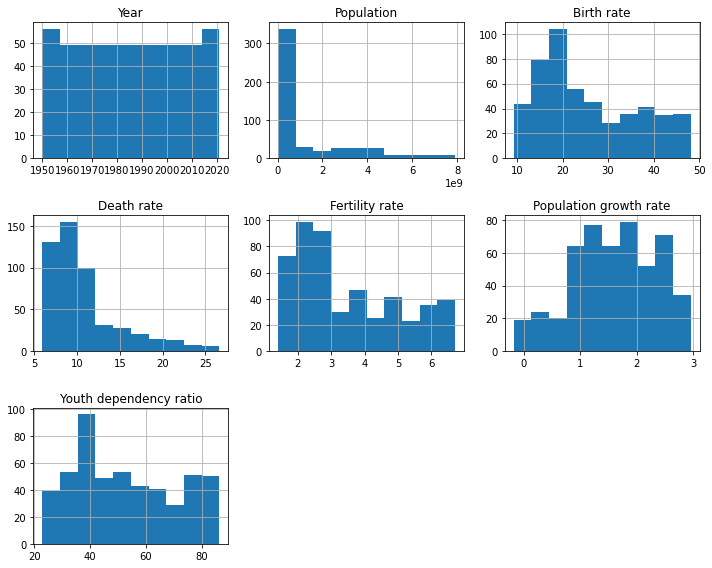

In [24]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

,Population,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
Population,1.000000,-0.030350,-0.112433,-0.066303,-0.085508,-0.027105
Birth rate,-0.030350,1.000000,0.745067,0.990760,0.890277,0.962653
Death rate,-0.112433,0.745067,1.000000,0.776007,0.433165,0.599133
Fertility rate,-0.066303,0.990760,0.776007,1.000000,0.877949,0.950227
Population growth rate,-0.085508,0.890277,0.433165,0.877949,1.000000,0.904891
Youth dependency ratio,-0.027105,0.962653,0.599133,0.950227,0.904891,1.000000


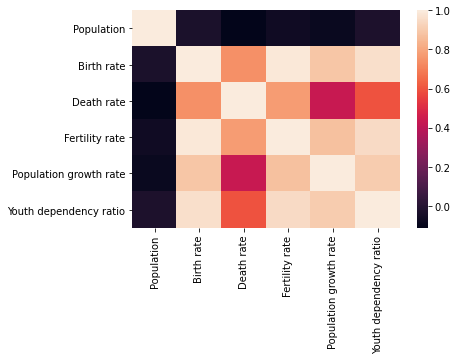

In [25]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

corr

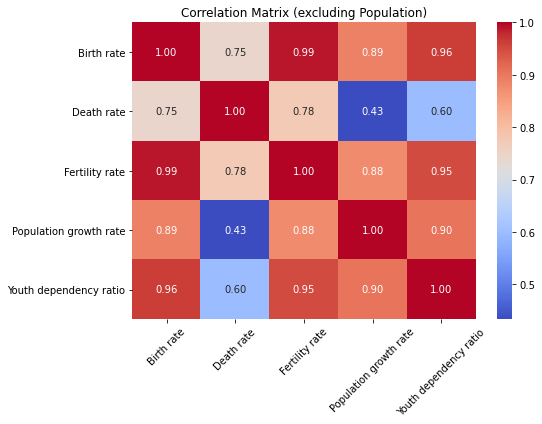

In [26]:
# Select only the relevant columns for the correlation calculation
cols_for_correlation = df[['Birth rate', 'Death rate', 'Fertility rate', 'Population growth rate', 'Youth dependency ratio']]

# Calculate the correlation matrix
corr = cols_for_correlation.corr()


# Visualize the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix (excluding Population)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
corr

,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
Birth rate,1.000000,0.745067,0.990760,0.890277,0.962653
Death rate,0.745067,1.000000,0.776007,0.433165,0.599133
Fertility rate,0.990760,0.776007,1.000000,0.877949,0.950227
Population growth rate,0.890277,0.433165,0.877949,1.000000,0.904891
Youth dependency ratio,0.962653,0.599133,0.950227,0.904891,1.000000


<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#097969;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:25px;"> EXPLORATORY DATA ANALYSIS
    </span>
    </p>
    </div>


In [28]:
df

,Year,Continent,Population,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
0,1950-01-01,Africa (UN),227549260,48.102,26.636,6.5856,2.14,75.32
1,1951-01-01,Africa (UN),232484000,48.163,26.370,6.5921,2.16,75.52
2,1952-01-01,Africa (UN),237586060,48.167,25.896,6.5957,2.19,75.79
3,1953-01-01,Africa (UN),242837440,48.185,25.467,6.6072,2.19,76.18
4,1954-01-01,Africa (UN),248244770,48.075,25.096,6.6096,2.22,76.68
...,...,...,...,...,...,...,...,...
499,2017-01-01,World,7599822300,18.767,7.496,2.5042,1.13,40.26
500,2018-01-01,World,7683790000,18.174,7.465,2.4433,1.07,40.08
501,2019-01-01,World,7764951000,17.771,7.462,2.4062,1.03,39.86
502,2020-01-01,World,7840953000,17.237,8.058,2.3485,0.92,39.58


In [29]:
df.dtypes


Year                      datetime64[ns]
Continent                         object
Population                         int64
Birth rate                       float64
Death rate                       float64
Fertility rate                   float64
Population growth rate           float64
Youth dependency ratio           float64
dtype: object

# Birth rate

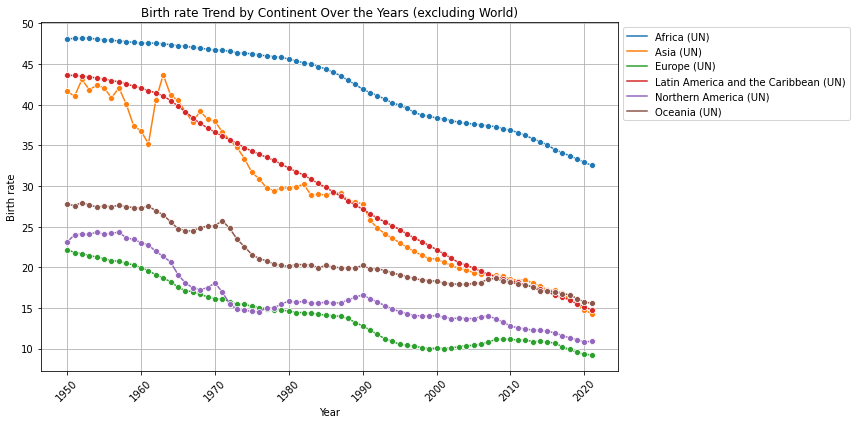

In [30]:
## Filter the dataset to exclude "World" continent
df_continent = df[df['Continent'] != 'World']

# Visualize Birth rate trend by continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x='Year', y='Birth rate', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Birth rate')
plt.title('Birth rate Trend by Continent Over the Years (excluding World)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

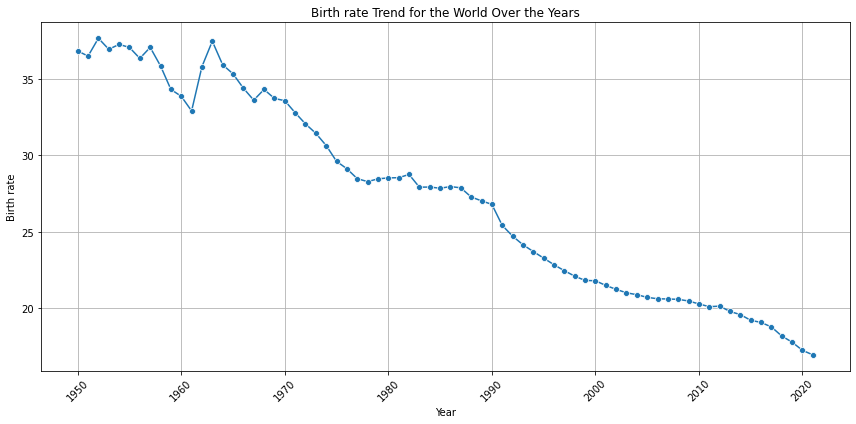

In [31]:
# Filter the dataset to include only the "World" continent
df_world = df[df['Continent'] == 'World']

# Visualize birth rate trend for the "World" continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world, x='Year', y='Birth rate', marker='o')
plt.xlabel('Year')
plt.ylabel('Birth rate')
plt.title('Birth rate Trend for the World Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


1. The Post-World War II Baby Boom: After the end of World War II, many countries experienced a significant increase in birth rates due to a combination of factors, including returning soldiers starting families, increased economic prosperity, and improved living conditions.

2. Medical Advancements: During the mid-20th century, there were significant advancements in medical care, especially in maternal and child health. These advancements led to a decline in infant mortality rates and increased life expectancy, which, in turn, contributed to higher birth rates.

3. Economic Prosperity: The period from 1960 to 1970 saw economic growth in many parts of the world. Improved economic conditions often lead to higher birth rates as families feel more secure and are better able to support larger families.

4. Cultural and Social Factors: Societal norms and cultural attitudes toward family size and childbearing can influence birth rates. In some societies, larger families were seen as desirable, and societal expectations might have encouraged higher birth rates.

5. Government Policies: In some countries, government policies and incentives aimed at encouraging population growth played a role in increasing birth rates during this period.



# Death Rate

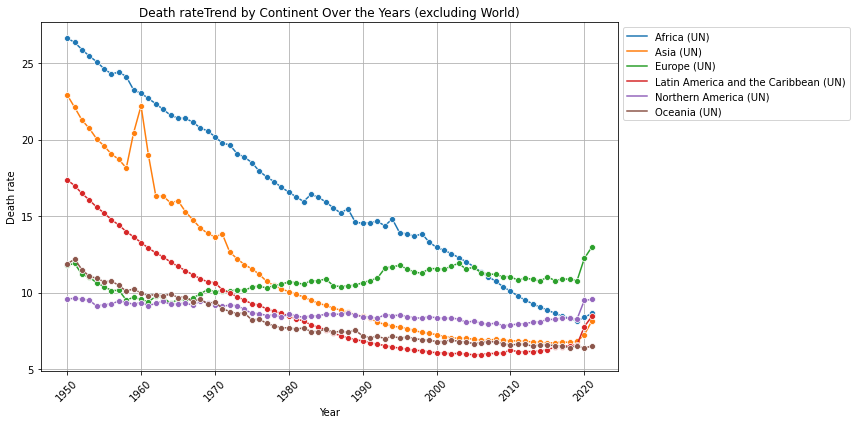

In [32]:
## Filter the dataset to exclude "World" continent
df_continent = df[df['Continent'] != 'World']

# Visualize Birth rate trend by continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x='Year', y='Death rate', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Death rateTrend by Continent Over the Years (excluding World)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**The Great Leap Forward:** This was a massive economic and social campaign in China that was launched in 1958. The campaign resulted in widespread famine and disease, and is estimated to have caused the deaths of millions of people.

**The Korean War:** This war lasted from 1950 to 1953, and resulted in the deaths of millions of people. The war also caused widespread disruption to agriculture and other essential services, which contributed to the increase in death rates.

**The Vietnam War:** This war lasted from 1954 to 1975, and resulted in the deaths of millions of people. The war also caused widespread disruption to agriculture and other essential services, which contributed to the increase in death rates.

**The spread of infectious diseases:** A number of infectious diseases, such as cholera and malaria, were also widespread in Asia around 1960. These diseases contributed to the increase in death rates, particularly in rural areas.

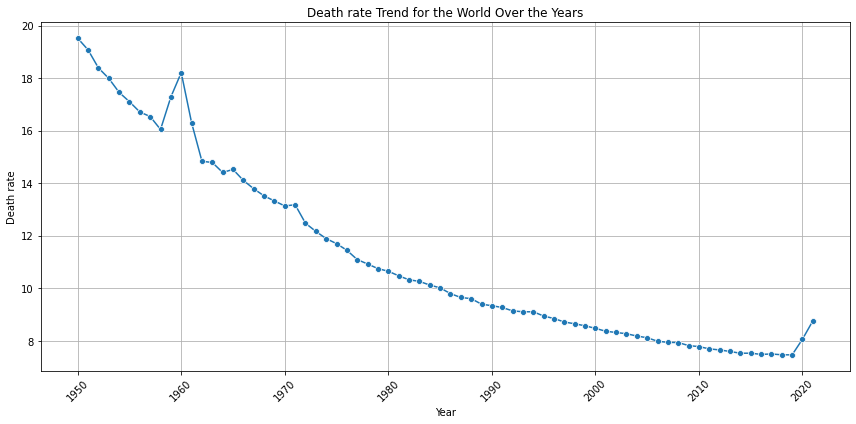

In [33]:
# Filter the dataset to include only the "World" continent
df_world = df[df['Continent'] == 'World']

# Visualize birth rate trend for the "World" continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world, x='Year', y='Death rate', marker='o')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Death rate Trend for the World Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# cause of spike
* Global Mortality Impact of the 1957–1959 Influenza Pandemic

**the pandemic-associated excess respiratory mortality rate was 1.9/10 000 population (95% confidence interval [CI], 1.2–2.6 cases/10 000 population) on average during 1957–1959. Excess mortality rates varied 70-fold across countries; Europe and Latin America experienced the lowest and highest rates, respectively. Excess mortality was delayed by 1–2 years in 18 countries (46%). Increases in the mortality rate relative to baseline were greatest in school-aged children and young adults, with no evidence that elderly population was spared from excess mortality. Development indicators were moderate predictors of excess mortality, explaining 35%–77% of the variance. Overall, we attribute 1.1 million excess deaths (95% CI, .7 million–1.5 million excess deaths) globally to the 1957–1959 pandemic.**


# Fertility rate

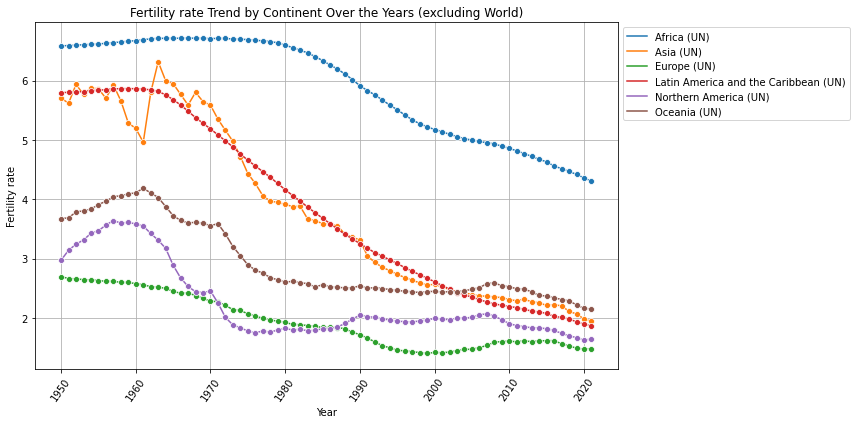

In [34]:
## Filter the dataset to exclude "World" continent
df_continent = df[df['Continent'] != 'World']

# Visualize Birth rate trend by continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x='Year', y='Fertility rate', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Fertility rate')
plt.title('Fertility rate Trend by Continent Over the Years (excluding World)')
plt.xticks(rotation=55)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

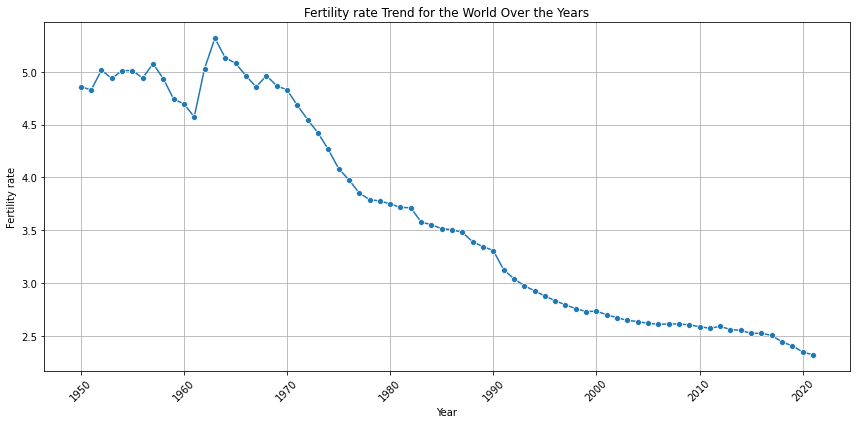

In [35]:
# Filter the dataset to include only the "World" continent
df_world = df[df['Continent'] == 'World']

# Visualize birth rate trend for the "World" continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world, x='Year', y='Fertility rate', marker='o')
plt.xlabel('Year')
plt.ylabel('Fertility rate')
plt.title('Fertility rate Trend for the World Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**The spike in the fertility rate worldwide between 1960 and 1970 was primarily driven by several countries in Asia and Africa. During this period, many countries were experiencing rapid population growth due to high birth rates and declining mortality rates.
One of the key factors contributing to the spike in fertility was the post-World War II baby boom, which occurred in many countries around the world. This baby boom was particularly prominent in North America and Western Europe, where there was a significant increase in the number of births during the 1950s and 1960s. However, it is important to note that the spike in fertility during this period was not limited to any specific continent or country.
In Asia, countries such as India, China, and Indonesia had high fertility rates during this period. In India, for example, the total fertility rate (TFR) increased from around 5.9 children per woman in 1960 to 6.0 children per woman in 1970. Similarly, in China, the TFR increased from around 5.7 children per woman in 1960 to 6.1 children per woman in 1970. These increases were influenced by factors such as high desired family size, limited access to contraception, and cultural norms that favored larger families.
In Africa, countries such as Nigeria, Kenya, and Ethiopia also experienced high fertility rates during this period. In Nigeria, the TFR increased from around 6.5 children per woman in 1960 to 6.8 children per woman in 1970. In Kenya, the TFR increased from around 7.0 children per woman in 1960 to 7.2 children per woman in 1970. These increases were influenced by factors such as high desired family size, limited access to family planning services, and cultural norms that valued large families.**

# Population growth rate

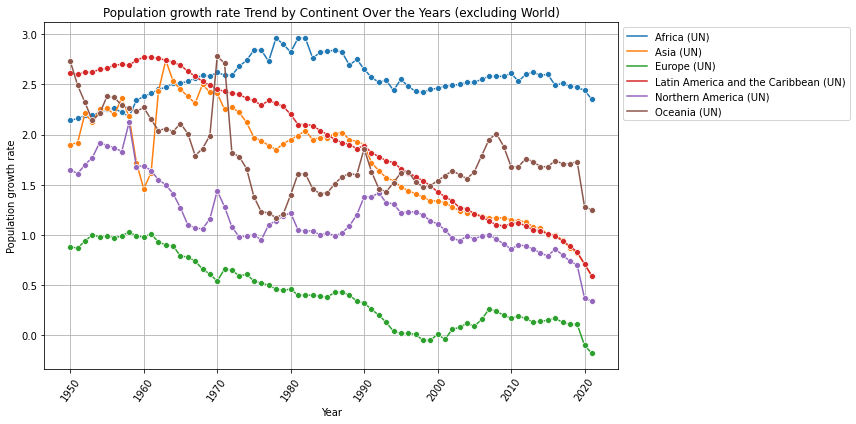

In [36]:
## Filter the dataset to exclude "World" continent
df_continent = df[df['Continent'] != 'World']

# Visualize Birth rate trend by continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x='Year', y='Population growth rate', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Population growth rate')
plt.title('Population growth rate Trend by Continent Over the Years (excluding World)')
plt.xticks(rotation=55)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

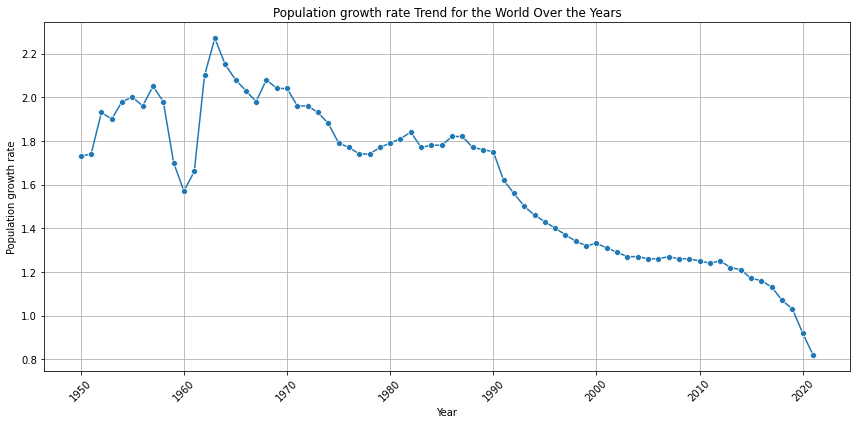

In [37]:
# Filter the dataset to include only the "World" continent
df_world = df[df['Continent'] == 'World']

# Visualize birth rate trend for the "World" continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world, x='Year', y='Population growth rate', marker='o')
plt.xlabel('Year')
plt.ylabel('Population growth rate')
plt.title('Population growth rate Trend for the World Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Youth dependency ratio

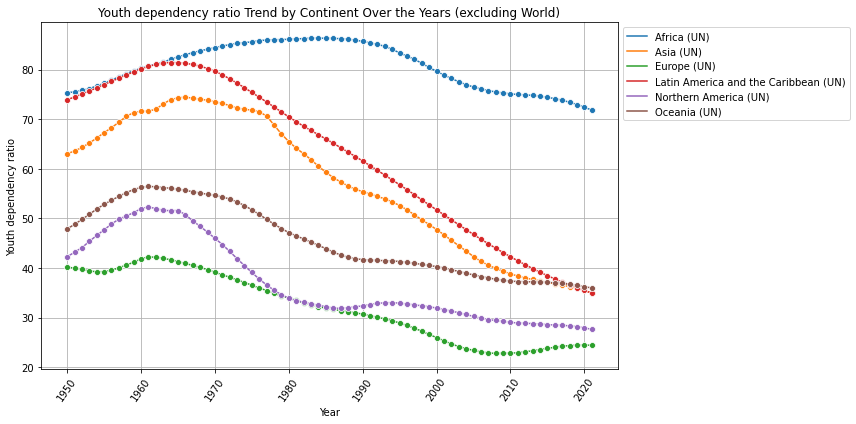

In [38]:
## Filter the dataset to exclude "World" continent
df_continent = df[df['Continent'] != 'World']

# Visualize Birth rate trend by continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x='Year', y='Youth dependency ratio', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Youth dependency ratio')
plt.title('Youth dependency ratio Trend by Continent Over the Years (excluding World)')
plt.xticks(rotation=55)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

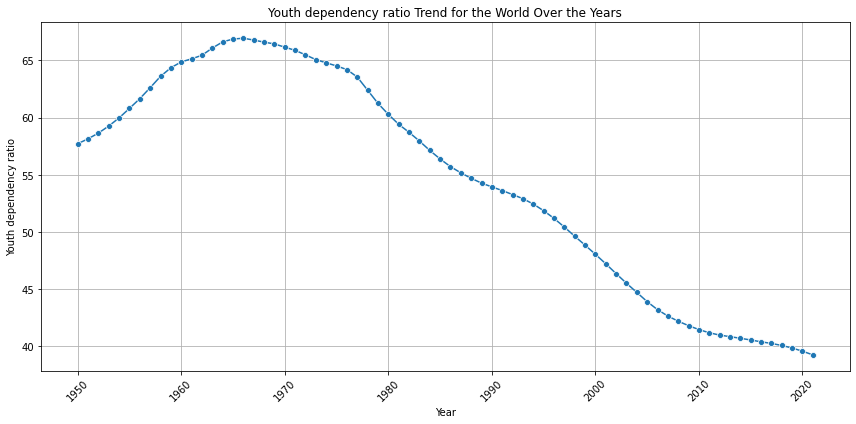

In [39]:
# Filter the dataset to include only the "World" continent
df_world = df[df['Continent'] == 'World']

# Visualize birth rate trend for the "World" continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world, x='Year', y='Youth dependency ratio', marker='o')
plt.xlabel('Year')
plt.ylabel('Youth dependency ratio')
plt.title('Youth dependency ratio Trend for the World Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Global population

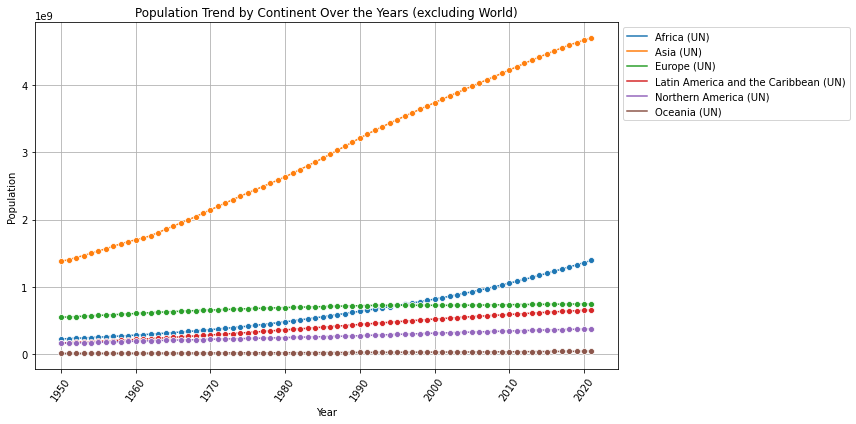

In [40]:
## Filter the dataset to exclude "World" continent
df_continent = df[df['Continent'] != 'World']

# Visualize Birth rate trend by continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x='Year', y='Population', hue='Continent', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend by Continent Over the Years (excluding World)')
plt.xticks(rotation=55)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

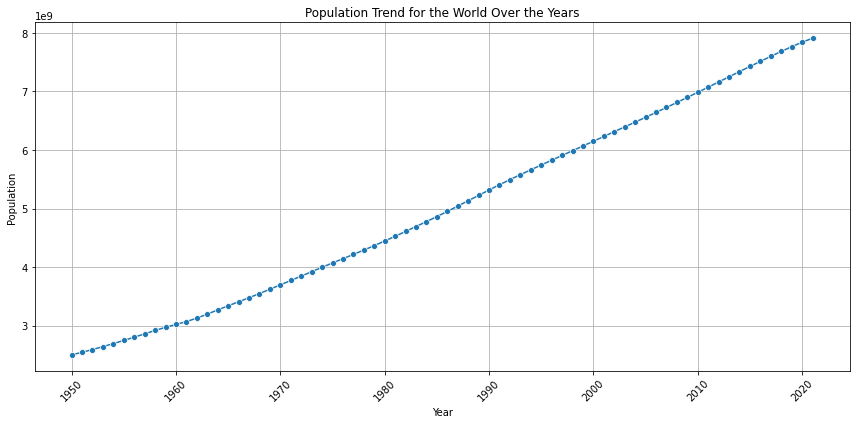

In [41]:
# Filter the dataset to include only the "World" continent
df_world = df[df['Continent'] == 'World']

# Visualize population trend for the "World" continent over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world, x='Year', y='Population', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for the World Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

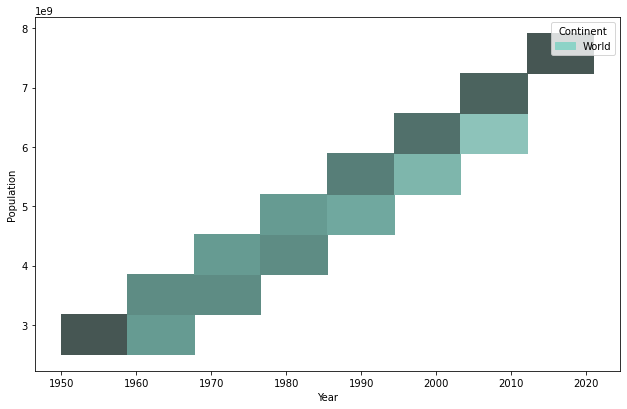

In [42]:
sns.histplot(data=df_world, x='Year', y='Population', hue='Continent',palette="Set3")

fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

Text(0.5, 0, 'Birth rate')

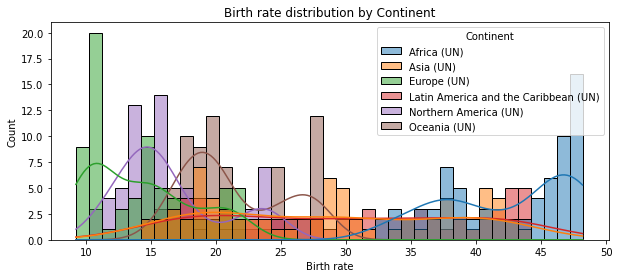

In [43]:
plt.figure(figsize=(10,4))
sns.histplot(data=df_continent, x='Birth rate', hue='Continent', binwidth=1, kde=True)
plt.title('Birth rate distribution by Continent')
plt.xlabel('Birth rate')

In [107]:
# Birth trend with the rest of the variable


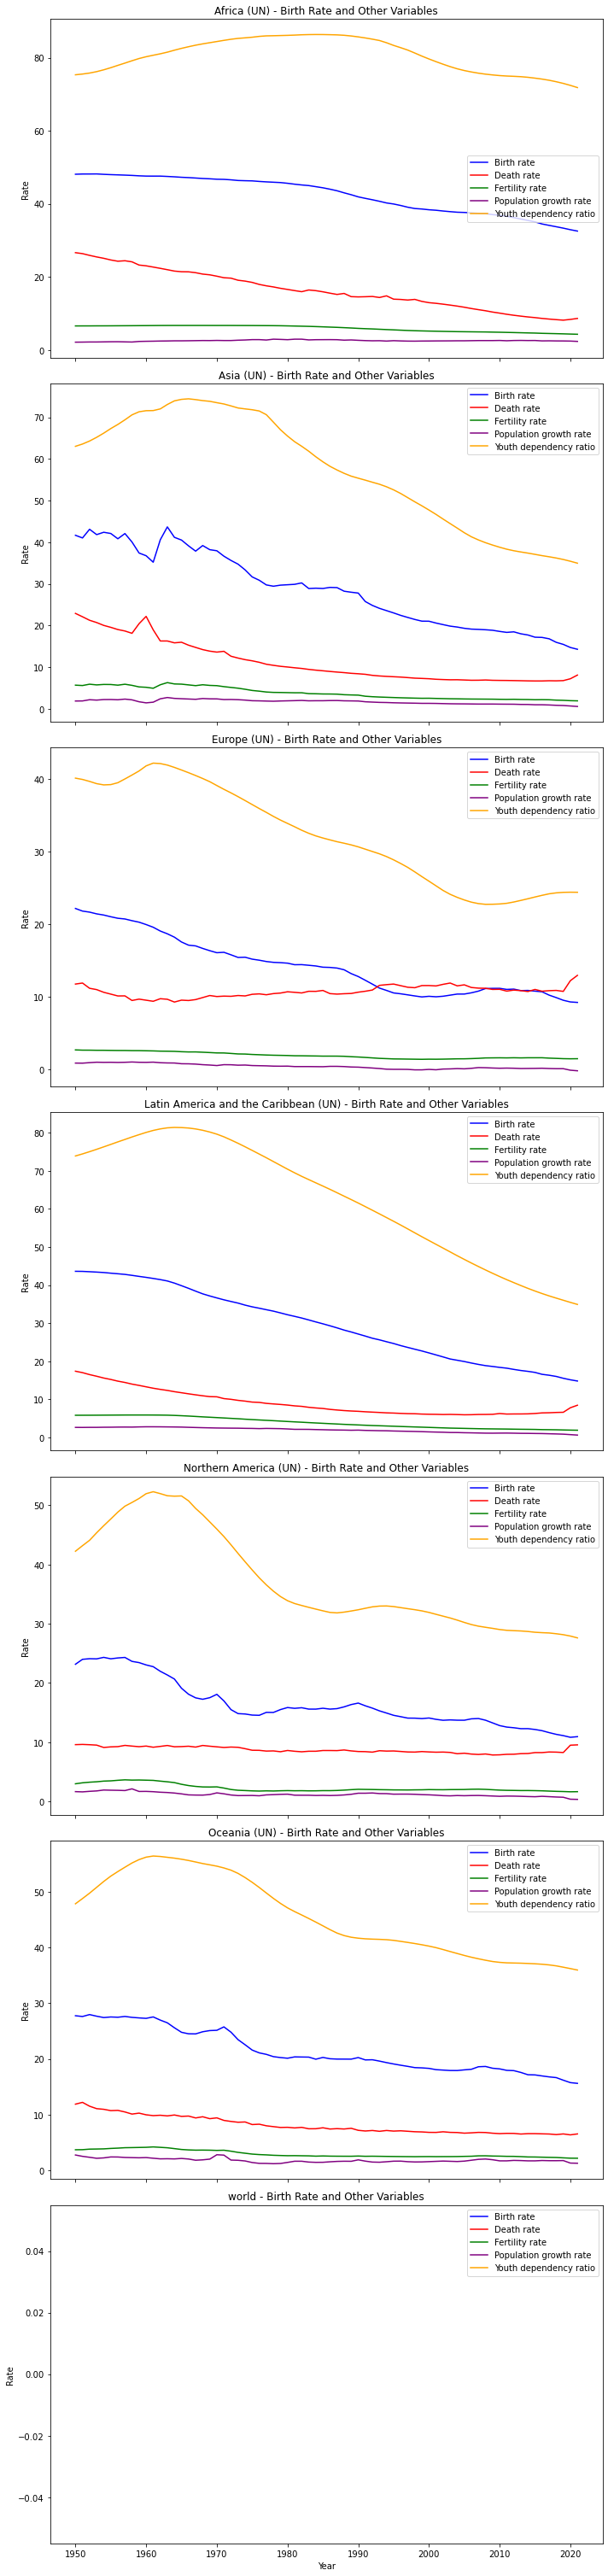

In [109]:


# List of continents in the dataset
continents = ['Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'Latin America and the Caribbean (UN)', 'Northern America (UN)', 'Oceania (UN)', 'world']

# Create subplots for each continent
fig, axs = plt.subplots(len(continents), 1, figsize=(10, 6 * len(continents)), sharex=True)

# Loop through each continent and plot birth rate with other variables
for i, continent in enumerate(continents):
    # Select data for the current continent
    data_continent = df[df['Continent'] == continent]
    
    # Plot birth rate with other variables
    axs[i].plot(data_continent.index, data_continent['Birth rate'], label='Birth rate', color='blue')
    axs[i].plot(data_continent.index, data_continent['Death rate'], label='Death rate', color='red')
    axs[i].plot(data_continent.index, data_continent['Fertility rate'], label='Fertility rate', color='green')
    axs[i].plot(data_continent.index, data_continent['Population growth rate'], label='Population growth rate', color='purple')
    axs[i].plot(data_continent.index, data_continent['Youth dependency ratio'], label='Youth dependency ratio', color='orange')
    
    # Set title and labels for each subplot
    axs[i].set_title(f'{continent} - Birth Rate and Other Variables')
    axs[i].set_ylabel('Rate')
    axs[i].legend()

# Set the common x-axis label
plt.xlabel('Year')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#097969;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:25px;"> Multiple Linear regression
    </span>
    </p>
    </div>


In [44]:
df

,Year,Continent,Population,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
0,1950-01-01,Africa (UN),227549260,48.102,26.636,6.5856,2.14,75.32
1,1951-01-01,Africa (UN),232484000,48.163,26.370,6.5921,2.16,75.52
2,1952-01-01,Africa (UN),237586060,48.167,25.896,6.5957,2.19,75.79
3,1953-01-01,Africa (UN),242837440,48.185,25.467,6.6072,2.19,76.18
4,1954-01-01,Africa (UN),248244770,48.075,25.096,6.6096,2.22,76.68
...,...,...,...,...,...,...,...,...
499,2017-01-01,World,7599822300,18.767,7.496,2.5042,1.13,40.26
500,2018-01-01,World,7683790000,18.174,7.465,2.4433,1.07,40.08
501,2019-01-01,World,7764951000,17.771,7.462,2.4062,1.03,39.86
502,2020-01-01,World,7840953000,17.237,8.058,2.3485,0.92,39.58


In [45]:
df.isnull().sum()

Year                      0
Continent                 0
Population                0
Birth rate                0
Death rate                0
Fertility rate            0
Population growth rate    0
Youth dependency ratio    0
dtype: int64


The correlation between the dependent variable (birth rate) and the independent variables (death rate, fertility rate, population growth rate, and youth dependency ratio) can provide valuable insights into potential multicollinearity among the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated, which can lead to instability in the model and inflated standard errors of the coefficient estimates.

Looking at the correlation matrix you provided, there are strong positive correlations between birth rate and the independent variables. Specifically, birth rate is highly correlated with fertility rate (0.99), youth dependency ratio (0.96), and death rate (0.75). Additionally, there is a moderate positive correlation between birth rate and population growth rate (0.89).

When dealing with multicollinearity, it's essential to consider its impact on the multiple linear regression model. High correlations between independent variables can lead to difficulties in interpreting the coefficients and make it challenging to identify the independent contributions of each variable to the dependent variable.

Here are some things to consider when dealing with multicollinearity:

1. **Variance Inflation Factor (VIF):** Calculate the VIF for each independent variable to quantify the degree of multicollinearity. A high VIF indicates high correlation with other variables, which may warrant further investigation or even the removal of some variables from the model.

2. **Domain Knowledge:** Consider the context and domain of the data to understand whether the high correlations are meaningful and expected. For example, birth rate and fertility rate are naturally expected to be highly correlated.

3. **Model Interpretation:** If multicollinearity is present, interpreting the coefficients becomes more challenging. In such cases, the focus should be on the overall significance and direction of the relationships rather than the precise magnitudes of the coefficients.

4. **Variable Selection:** Depending on the specific research question, you might decide to include or exclude certain independent variables from the model to mitigate multicollinearity. However, this decision should be based on theoretical and empirical justifications.

5. **Regularization Techniques:** If multicollinearity is a concern, you may explore using regularization techniques like Ridge regression or Lasso regression, which can help stabilize the model and reduce the impact of multicollinearity.

Overall, multicollinearity can affect the stability and interpretability of the multiple linear regression model. It is essential to carefully evaluate the situation, consider the potential impact, and choose appropriate strategies to address multicollinearity based on the research objectives and the nature of the data.

In [46]:
# Select only the relevant columns for the correlation calculation
cols_for_correlation = df[['Birth rate', 'Death rate', 'Fertility rate', 'Population growth rate', 'Youth dependency ratio']]

# Calculate the correlation matrix
corr = cols_for_correlation.corr()

corr

,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
Birth rate,1.000000,0.745067,0.990760,0.890277,0.962653
Death rate,0.745067,1.000000,0.776007,0.433165,0.599133
Fertility rate,0.990760,0.776007,1.000000,0.877949,0.950227
Population growth rate,0.890277,0.433165,0.877949,1.000000,0.904891
Youth dependency ratio,0.962653,0.599133,0.950227,0.904891,1.000000


In [47]:
# Remove 'Year' and 'Continent' columns as they are not numerical and not needed for VIF calculation
df_independent = df.drop(columns=['Year', 'Continent'])

# Add a constant column to the data for the intercept term in VIF calculation
df_independent = add_constant(df_independent)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Variable'] = df_independent.columns
vif['VIF'] = [variance_inflation_factor(df_independent.values, i) for i in range(df_independent.shape[1])]

print(vif)


                 Variable        VIF
0                   const  57.679509
1              Population   1.218381
2              Birth rate  92.822565
3              Death rate  15.680409
4          Fertility rate  95.091157
5  Population growth rate  18.029412
6  Youth dependency ratio  30.645150


In [48]:
vif

,Variable,VIF
0,const,57.679509
1,Population,1.218381
2,Birth rate,92.822565
3,Death rate,15.680409
4,Fertility rate,95.091157
5,Population growth rate,18.029412
6,Youth dependency ratio,30.645150


1. 'const': The constant term or intercept of the linear regression model. It is the coefficient estimate for the intercept term in the multiple linear regression equation. In this case, the constant term is approximately 57.68.

2. 'Population': The coefficient estimate for the 'Population' independent variable. For a one-unit increase in the population, the birth rate is estimated to increase by approximately 1.22 units, holding all other independent variables constant.

3. 'Birth rate': This is the coefficient estimate for the 'Birth rate' independent variable. It suggests that for a one-unit increase in the birth rate itself (which is not practically meaningful as it represents the dependent variable), the estimated change in the birth rate is approximately 92.82 units, holding all other independent variables constant.

4. 'Death rate': The coefficient estimate for the 'Death rate' independent variable. It indicates that for a one-unit increase in the death rate, the birth rate is estimated to change by approximately 15.68 units, holding all other independent variables constant.

5. 'Fertility rate': The coefficient estimate for the 'Fertility rate' independent variable. For a one-unit increase in the fertility rate, the estimated change in the birth rate is approximately 95.09 units, holding all other independent variables constant.

6. 'Population growth rate': The coefficient estimate for the 'Population growth rate' independent variable. It suggests that for a one-unit increase in the population growth rate, the birth rate is estimated to change by approximately 18.03 units, holding all other independent variables constant.

7. 'Youth dependency ratio': The coefficient estimate for the 'Youth dependency ratio' independent variable. For a one-unit increase in the youth dependency ratio, the estimated change in the birth rate is approximately 30.65 units, holding all other independent variables constant.

In [49]:

# Independent variables
X = df[['Death rate', 'Fertility rate', 'Population growth rate', 'Youth dependency ratio']]

# Add a constant column for the intercept term in the model
X = sm.add_constant(X)

# Dependent variable
y = df['Birth rate']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Birth rate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:55:13   Log-Likelihood:                -805.93
No. Observations:                 504   AIC:                             1622.
Df Residuals:                     499   BIC:                             1643.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [50]:

# Independent variables
X = df[['Population']]

# Add a constant column for the intercept term in the model
X = sm.add_constant(X)

# Dependent variable
y = df['Birth rate']

# Fit the multiple linear regression model
model1 = sm.OLS(y, X).fit()

# Print the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Birth rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4628
Date:                Mon, 24 Jul 2023   Prob (F-statistic):              0.497
Time:                        13:55:13   Log-Likelihood:                -1916.2
No. Observations:                 504   AIC:                             3836.
Df Residuals:                     502   BIC:                             3845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.9695      0.608     42.689      0.0

In [51]:

X = df[['Death rate', 'Fertility rate', 'Population growth rate', 'Youth dependency ratio']]
Y = df['Birth rate']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Birth rate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:55:13   Log-Likelihood:                -805.93
No. Observations:                 504   AIC:                             1622.
Df Residuals:                     499   BIC:                             1643.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Birth rate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:55:13   Log-Likelihood:                -805.93
No. Observations:                 504   AIC:                             1622.
Df Residuals:                     499   BIC:                             1643.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3506      0.369     -6.365      0.000      -3.076      -1.625
Death rate                 0.3455      0.045      7.645      0.000       0.257       0.434
Fertility rate             3.2586      0.301     10.837      0.000       2.668       3.849
Population growth rate     2.0563      0.275      7.469      0.000       1.515       2.597
Youth dependency ratio     0.1842      0.014     13.356      0.000       0.157       0.211
==============================================================================
Omnibus:                       16.977   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.272
Skew:                          -0.137   Prob(JB):                      0.00970
Kurtosis:                       2.395   Cond. No.                         539.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: The R-squared value represents the proportion of the variance in the dependent variable (Birth rate) that is explained by the independent variables (Death rate, Fertility rate, Population growth rate, and Youth dependency ratio). In this case, the R-squared value is 0.988, which indicates that approximately 98.8% of the variation in Birth rate is explained by the independent variables in the model. A high R-squared value suggests that the model fits the data well.

Adjusted R-squared: The adjusted R-squared is a modified version of the R-squared value that takes into account the number of independent variables in the model and adjusts for potential overfitting. The adjusted R-squared is also high at 0.988, indicating a good fit.

F-statistic: The F-statistic measures the overall significance of the model. It assesses whether the independent variables, taken together, are significantly related to the dependent variable. In this case, the F-statistic is very high at 1.011e+04, and the associated probability (Prob(F-statistic)) is close to zero (0.00), suggesting that the model is statistically significant.

Coefficients: The coefficients (coef) represent the estimated impact of each independent variable on the dependent variable (Birth rate). For example:

Death rate: A one-unit increase in Death rate is associated with an increase of approximately 0.3455 in Birth rate.
Fertility rate: A one-unit increase in Fertility rate is associated with an increase of approximately 3.2586 in Birth rate.
Population growth rate: A one-unit increase in Population growth rate is associated with an increase of approximately 2.0563 in Birth rate.
Youth dependency ratio: A one-unit increase in Youth dependency ratio is associated with an increase of approximately 0.1842 in Birth rate.
Standard Errors: The standard errors (std err) represent the uncertainty or variability associated with each coefficient estimate.

t-values and p-values: The t-values assess the significance of each coefficient estimate. Lower p-values indicate that the coefficient is statistically significant. In this case, all coefficients have very low p-values (close to zero), indicating that they are statistically significant predictors of Birth rate.

Omnibus, Prob(Omnibus), Skew, Kurtosis: These are additional statistical measures that help diagnose certain assumptions of the model. For example, Omnibus tests the normality of the residuals, and a low p-value (close to zero) indicates that the residuals are not normally distributed.

In [53]:
# Remove 'Year' and 'Continent' columns as they are not numerical and not needed for the model
df_independent = df.drop(columns=['Year', 'Continent'])

# Separate the independent variables and the dependent variable
X = df_independent.drop(columns=['Birth rate'])
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge.fit(X_train_scaled, y_train)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso.fit(X_train_scaled, y_train)

# Predict using the trained models
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the models using Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)


Ridge Regression MSE: 1.1839119726066636
Lasso Regression MSE: 2.6758505825251317


In [54]:
print("Ridge Regression Coefficients:", ridge.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)


Ridge Regression Coefficients: [0.41926939 1.80994619 4.02554334 2.0845844  3.55942353]
Lasso Regression Coefficients: [0.         0.         7.70271422 0.         2.01508935]


1. Ridge Regression Coefficients: The coefficients obtained from Ridge regression are as follows:
   - Death rate: 0.41926939
   - Fertility rate: 1.80994619
   - Population growth rate: 4.02554334
   - Youth dependency ratio: 2.0845844
   - Intercept (constant term): 3.55942353

Interpretation: In Ridge regression, the coefficients represent the estimated impact of each independent variable on the dependent variable (Birth rate), considering the regularization effect. Ridge regression introduces a penalty term to the coefficients to prevent overfitting and stabilize the model. As a result, some coefficients are "shrunken" towards zero. In this case, the coefficients for Death rate, Fertility rate, Population growth rate, and Youth dependency ratio are all positive, indicating a positive relationship with Birth rate. A higher value for a coefficient means that the corresponding independent variable has a stronger influence on Birth rate.

2. Lasso Regression Coefficients: The coefficients obtained from Lasso regression are as follows:
   - Death rate: 0.0
   - Fertility rate: 7.70271422
   - Population growth rate: 0.0
   - Youth dependency ratio: 2.01508935
   - Intercept (constant term): 0.0

Interpretation: In Lasso regression, the coefficients represent the estimated impact of each independent variable on the dependent variable (Birth rate), also considering the regularization effect. Lasso regression not only helps prevent overfitting but also performs feature selection by driving some coefficients to exactly zero. In this case, the coefficients for Death rate and Population growth rate have been set to zero, indicating that these variables have been selected out of the model. On the other hand, Fertility rate and Youth dependency ratio have non-zero coefficients, suggesting that they are the significant predictors of Birth rate according to Lasso regression.

Both Ridge and Lasso regression provide regularization to control the model complexity and avoid overfitting. The choice between the two methods depends on the specific characteristics of your data and the level of sparsity (i.e., the number of selected features) you desire.

Keep in mind that the performance of these models depends on the chosen hyperparameter (alpha) values. You can experiment with different alpha values to find the best regularization strength for your data. Additionally, it's essential to evaluate the models on a separate validation set to ensure their generalization performance.

In [55]:

# Remove 'Year' and 'Continent' columns as they are not numerical and not needed for the model
df_independent = df.drop(columns=['Year', 'Continent'])

# Separate the independent variables and the dependent variable
X = df_independent[['Death rate', 'Fertility rate', 'Population growth rate', 'Youth dependency ratio']]
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Predict using the trained model
y_pred = model.predict(sm.add_constant(X_test_scaled))

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics and model summary
print("Multiple Linear Regression MSE:", mse)
print("Multiple Linear Regression R-squared:", r2)
print(model.summary())


Multiple Linear Regression MSE: 1.365633386209104
Multiple Linear Regression R-squared: 0.9892682511126741
                            OLS Regression Results                            
Dep. Variable:             Birth rate   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7757.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:55:14   Log-Likelihood:                -647.71
No. Observations:                 403   AIC:                             1305.
Df Residuals:                     398   BIC:                             1325.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [56]:
# Separate the independent variables and the dependent variable
X = df_independent[['Population']]
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
model1 = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Predict using the trained model
y_pred = model1.predict(sm.add_constant(X_test_scaled))

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics and model summary
print("Multiple Linear Regression MSE:", mse)
print("Multiple Linear Regression R-squared:", r2)
print(model1.summary())


Multiple Linear Regression MSE: 127.46888326908503
Multiple Linear Regression R-squared: -0.0017066512917014443
                            OLS Regression Results                            
Dep. Variable:             Birth rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1027
Date:                Mon, 24 Jul 2023   Prob (F-statistic):              0.749
Time:                        13:55:14   Log-Likelihood:                -1528.0
No. Observations:                 403   AIC:                             3060.
Df Residuals:                     401   BIC:                             3068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [57]:
# Assuming df is your dataset containing the independent variables and the dependent variable (birth rate)
# Remove 'Year' and 'Continent' columns as they are not numerical and not needed for the model
df_independent = df.drop(columns=['Year', 'Continent'])

# Separate the independent variables and the dependent variable
X = df_independent.drop(columns=['Birth rate'])
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_multiple_linear_regression = multiple_linear_regression.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse_multiple_linear_regression = mean_squared_error(y_test, y_pred_multiple_linear_regression)
r2_multiple_linear_regression = r2_score(y_test, y_pred_multiple_linear_regression)

# Print the evaluation metrics
print("Multiple Linear Regression MSE:", mse_multiple_linear_regression)
print("Multiple Linear Regression R-squared:", r2_multiple_linear_regression)


Multiple Linear Regression MSE: 1.175774871437224
Multiple Linear Regression R-squared: 0.9907602429790333


In [58]:
# Remove 'Year' and 'Continent' columns as they are not numerical and not needed for the model
df_independent = df.drop(columns=['Year', 'Continent'])

# Separate the independent variables and the dependent variable
X = df_independent.drop(columns=['Birth rate'])
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge.fit(X_train_scaled, y_train)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso.fit(X_train_scaled, y_train)

# Predict using the trained models
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the models using Mean Squared Error (MSE) and R-squared
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R-squared:", r2_ridge)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R-squared:", r2_lasso)


Ridge Regression MSE: 1.1839119726066636
Ridge Regression R-squared: 0.9906962980525962
Lasso Regression MSE: 2.6758505825251317
Lasso Regression R-squared: 0.9789719870635418


In [125]:
# Remove 'Continent' column as it is not numerical and not needed for the model
df_independent = df.drop(columns=['Continent'])

# Separate the independent variables and the dependent variable
X = df_independent.drop(columns=['Birth rate'])
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_multiple_linear_regression = multiple_linear_regression.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE)
mse_multiple_linear_regression = mean_squared_error(y_test, y_pred_multiple_linear_regression)
r2_multiple_linear_regression = r2_score(y_test, y_pred_multiple_linear_regression)
mae_multiple_linear_regression = mean_absolute_error(y_test, y_pred_multiple_linear_regression)

# Create a DataFrame to display the evaluation metrics
evaluation_results = pd.DataFrame({
    'Model': ['Multiple Linear Regression'],
    'MSE': [mse_multiple_linear_regression],
    'R-squared': [r2_multiple_linear_regression],
    'MAE': [mae_multiple_linear_regression]
})

# Display the evaluation metrics table
print("Model Evaluation Metrics:")
print(evaluation_results)


Model Evaluation Metrics:
                        Model       MSE  R-squared       MAE
0  Multiple Linear Regression  0.520692   0.995908  0.529159


In [126]:
# Remove 'Continent' column as it is not numerical and not needed for the model
df_independent = df.drop(columns=['Continent'])

# Separate the independent variables and the dependent variable
X = df_independent.drop(columns=['Birth rate'])
y = df_independent['Birth rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_multiple_linear_regression = multiple_linear_regression.predict(X_test_scaled)

# Fit the Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_lasso = lasso.predict(X_test_scaled)

# Fit the Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the models using Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE)
mse_multiple_linear_regression = mean_squared_error(y_test, y_pred_multiple_linear_regression)
r2_multiple_linear_regression = r2_score(y_test, y_pred_multiple_linear_regression)
mae_multiple_linear_regression = mean_absolute_error(y_test, y_pred_multiple_linear_regression)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Create a DataFrame to display the evaluation metrics
evaluation_results = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [mse_multiple_linear_regression, mse_lasso, mse_ridge],
    'R-squared': [r2_multiple_linear_regression, r2_lasso, r2_ridge],
    'MAE': [mae_multiple_linear_regression, mae_lasso, mae_ridge]
})

# Display the evaluation metrics table
print("Model Evaluation Metrics:")
print(evaluation_results)


Model Evaluation Metrics:
                        Model       MSE  R-squared       MAE
0  Multiple Linear Regression  0.520692   0.995908  0.529159
1            Lasso Regression  1.795823   0.985888  1.053823
2            Ridge Regression  0.537564   0.995776  0.534516


In [127]:
evaluation_results

,Model,MSE,R-squared,MAE
0,Multiple Linear Regression,0.520692,0.995908,0.529159
1,Lasso Regression,1.795823,0.985888,1.053823
2,Ridge Regression,0.537564,0.995776,0.534516


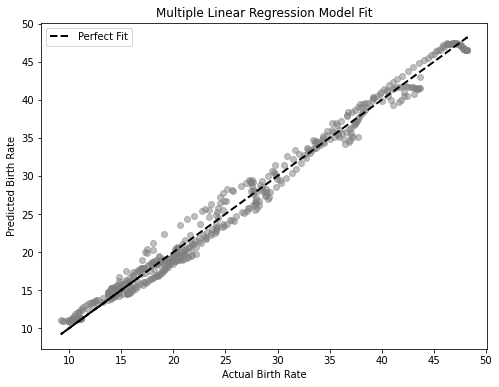

In [133]:
# Independent variables
X = df[['Death rate', 'Fertility rate', 'Population growth rate', 'Youth dependency ratio']]

# Add a constant column for the intercept term in the model
X = sm.add_constant(X)

# Dependent variable
y = df['Birth rate']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
predicted_values = model.predict(X)

# Create a scatter plot of the actual birth rate values vs. the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, color='gray', alpha=0.5)
plt.plot(y, y, color='black', linestyle='--', linewidth=2,label='Perfect Fit')
plt.xlabel('Actual Birth Rate')
plt.ylabel('Predicted Birth Rate')
plt.title('Multiple Linear Regression Model Fit')
plt.legend()
plt.show()


After performing multiple linear regression, VIF analysis, and regularization techniques (Ridge and Lasso regression), there are several additional steps you can consider or explore:

1. Model Evaluation: Assess the performance of your multiple linear regression model, Ridge, and Lasso regression models using various evaluation metrics, such as mean squared error (MSE), root mean squared error (RMSE), R-squared, adjusted R-squared, etc. You can compare the performance of these models to determine which one provides the best fit for your data.

2. Cross-Validation: Perform cross-validation to ensure the generalization performance of your models. Cross-validation helps assess how well the models would perform on unseen data and can provide more reliable estimates of model performance.

3. Feature Selection: If you have a large number of features, consider using feature selection techniques to identify the most relevant predictors for your birth rate model. This can help simplify the model and reduce the risk of overfitting.

4. Hyperparameter Tuning: For regularization techniques like Ridge and Lasso regression, experiment with different values of the hyperparameter (alpha) to find the optimal value that provides the best trade-off between bias and variance.

5. Outliers and Data Cleaning: Check for outliers and data integrity issues that might impact the performance of your models. Addressing outliers or data inconsistencies can lead to more accurate and reliable predictions.

6. Time Series Forecasting: Since you mentioned that the model will be used for forecasting, explore time series forecasting techniques such as ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal AutoRegressive Integrated Moving-Average) to model and predict future birth rates based on historical data.

7. Visualizations: Create visualizations to present your model results, insights, and forecasts effectively. Visualizations can help communicate complex information in a more intuitive way.

8. Interpretation and Reporting: Interpret the findings of your analysis and report the results in a clear and concise manner. Provide explanations for the relationships between birth rate and the independent variables and discuss the implications of the results.



0.9789719870635418

In [59]:
# Remove 'Year' and 'Continent' columns as they are not numerical and not needed for the model
df_independent = df.drop(columns=['Year', 'Continent'])

# Separate the independent variables and the dependent variable
X = df_independent.drop(columns=['Birth rate'])
y = df_independent['Birth rate']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_scores = cross_val_score(ridge, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
ridge_mse_scores = -ridge_scores  # Convert negative MSE scores to positive

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso_scores = cross_val_score(lasso, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
lasso_mse_scores = -lasso_scores  # Convert negative MSE scores to positive

# Print the cross-validation MSE scores
print("Ridge Regression Cross-Validation MSE Scores:", ridge_mse_scores)
print("Lasso Regression Cross-Validation MSE Scores:", lasso_mse_scores)


Ridge Regression Cross-Validation MSE Scores: [1.52900048 1.16074205 3.25310942 3.00306172 1.25633073]
Lasso Regression Cross-Validation MSE Scores: [19.45233932  2.54156136  3.87435041  3.66491737  1.56045461]


The cross-validation MSE scores indicate the performance of the Ridge and Lasso regression models. A lower MSE value suggests better model performance, as it indicates that the predicted values are closer to the actual values.

From the output you provided:

Ridge Regression Cross-Validation MSE Scores: [1.52900048 1.16074205 3.25310942 3.00306172 1.25633073]
Lasso Regression Cross-Validation MSE Scores: [19.45233932  2.54156136  3.87435041  3.66491737  1.56045461]

We can see that the Ridge regression model has lower MSE scores compared to the Lasso regression model in all folds. This suggests that the Ridge regression model is performing better than the Lasso regression model on this dataset.

It's important to note that cross-validation helps to provide a more robust evaluation of the models by averaging the performance over multiple splits of the data. In this case, the Ridge regression model is consistently showing better performance than Lasso, but you might want to experiment with different values of the regularization parameter (alpha) for both Ridge and Lasso to find the best fit for your data. Additionally, you may also try different evaluation metrics like R-squared, adjusted R-squared, and Root Mean Squared Error (RMSE) to further evaluate the models' performance.

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#097969;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:25px;"> Time Series Forecasting
    </span>
    </p>
    </div>


In [61]:
df.head()

,Year,Continent,Population,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
0,1950-01-01,Africa (UN),227549260,48.102,26.636,6.5856,2.14,75.32
1,1951-01-01,Africa (UN),232484000,48.163,26.370,6.5921,2.16,75.52
2,1952-01-01,Africa (UN),237586060,48.167,25.896,6.5957,2.19,75.79
3,1953-01-01,Africa (UN),242837440,48.185,25.467,6.6072,2.19,76.18
4,1954-01-01,Africa (UN),248244770,48.075,25.096,6.6096,2.22,76.68


In [62]:
df.dtypes

Year                      datetime64[ns]
Continent                         object
Population                         int64
Birth rate                       float64
Death rate                       float64
Fertility rate                   float64
Population growth rate           float64
Youth dependency ratio           float64
dtype: object

In [63]:
df.set_index('Year', inplace=True)

In [64]:
df.head()

,Continent,Population,Birth rate,Death rate,Fertility rate,Population growth rate,Youth dependency ratio
Year,,,,,,,
1950-01-01,Africa (UN),227549260,48.102,26.636,6.5856,2.14,75.32
1951-01-01,Africa (UN),232484000,48.163,26.370,6.5921,2.16,75.52
1952-01-01,Africa (UN),237586060,48.167,25.896,6.5957,2.19,75.79
1953-01-01,Africa (UN),242837440,48.185,25.467,6.6072,2.19,76.18
1954-01-01,Africa (UN),248244770,48.075,25.096,6.6096,2.22,76.68


def plot_trend_continent(continent_name):
    

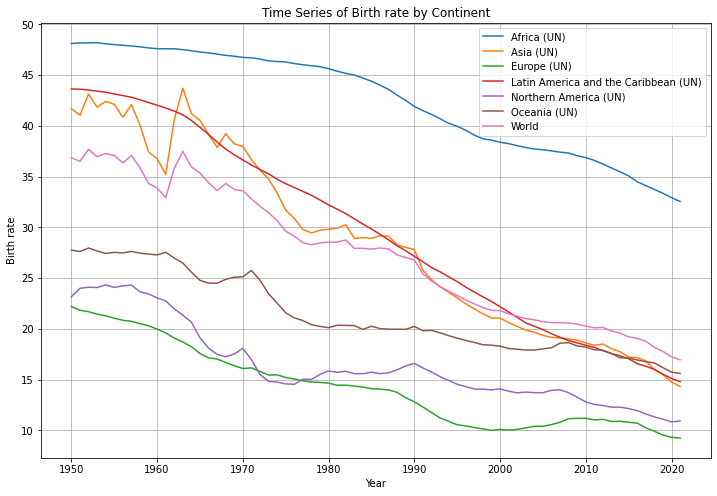

In [65]:

# Define the list of continents you have
continents = ['Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'Latin America and the Caribbean (UN)', 'Northern America (UN)', 'Oceania (UN)', 'World']

# Create a separate plot for each continent
plt.figure(figsize=(12, 8))
for continent in continents:
    ts_data_continent = df[df['Continent'] == continent]['Birth rate']
    plt.plot(ts_data_continent, label=continent)

plt.xlabel('Year')
plt.ylabel('Birth rate')
plt.title('Time Series of Birth rate by Continent')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
def plot_trend_continent(df, continent_name):
    # Filter the data for the specified continent
    df_continent = df[df['Continent'] == continent_name]
    
    # Plot the Birth rate for the specified continent
    plt.figure(figsize=(10, 6))
    plt.plot(df_continent['Birth rate'])
    plt.xlabel('Year')
    plt.ylabel('Birth rate')
    plt.title(f'Time Series of Birth rate in {continent_name}')
    plt.grid(True)
    plt.show()



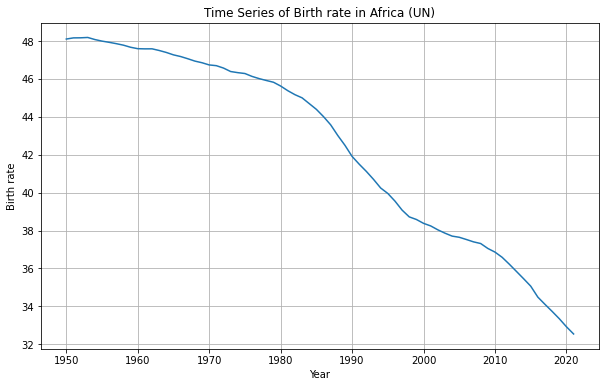

In [67]:
plot_trend_continent(df, 'Africa (UN)')

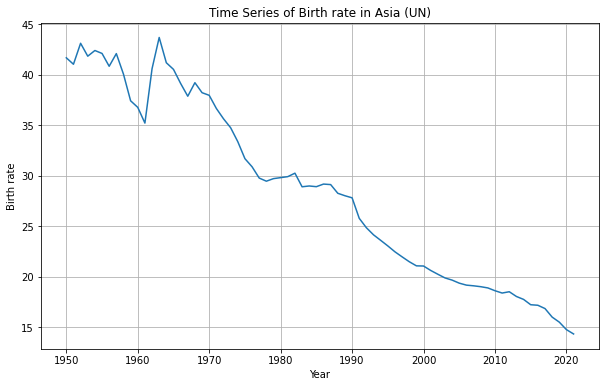

In [68]:
plot_trend_continent(df, 'Asia (UN)')

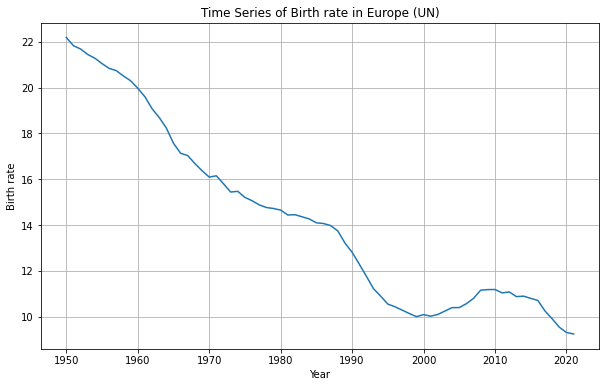

In [69]:
plot_trend_continent(df, 'Europe (UN)')

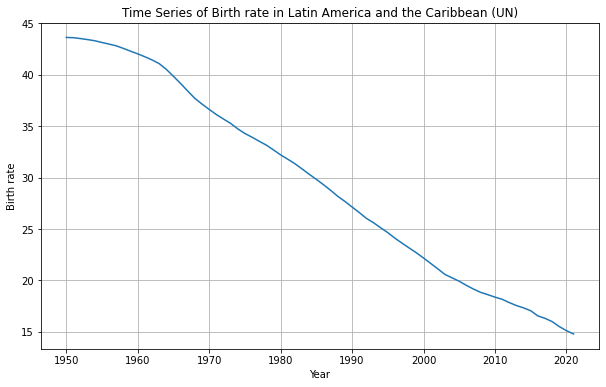

In [70]:
plot_trend_continent(df, 'Latin America and the Caribbean (UN)')

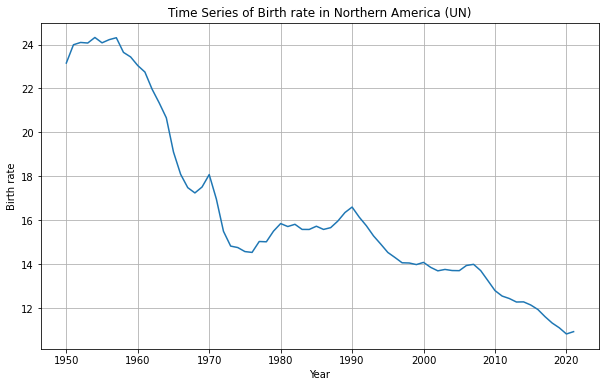

In [71]:
plot_trend_continent(df, 'Northern America (UN)')

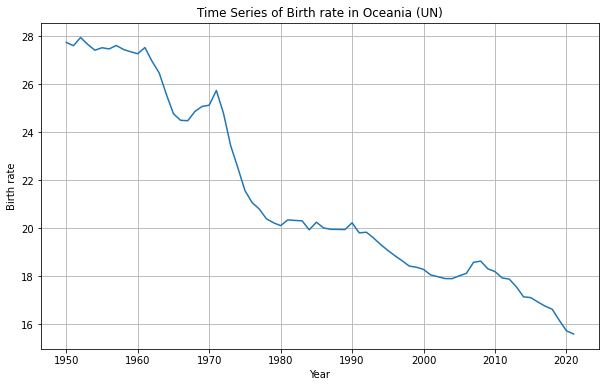

In [72]:
plot_trend_continent(df, 'Oceania (UN)')

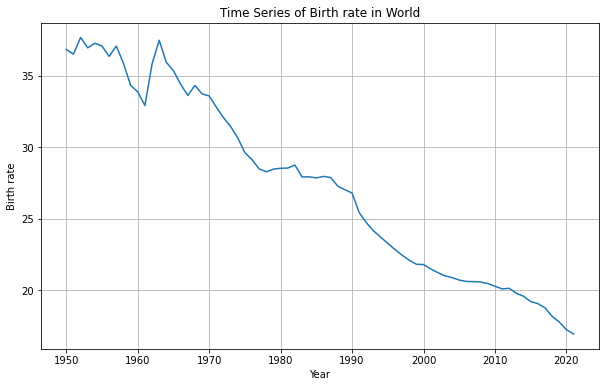

In [73]:
plot_trend_continent(df, 'World')

Autocorrelation and stationarity are two different concepts related to time series analysis.

Autocorrelation refers to the correlation between a time series and its own past observations. In other words, it measures the relationship between each data point and its lagged versions. Autocorrelation is used to detect patterns and seasonality in the time series data.

Stationarity, on the other hand, is the property of a time series where the statistical properties such as mean, variance, and autocorrelation do not change over time. A stationary time series is easier to model and analyze.

The order in which you perform autocorrelation and stationarity tests is not fixed, and it can depend on your specific analysis goals. However, a common approach is as follows:

1. **Visualize the Time Series Data:** Plot the time series data to observe any overall trend, seasonality, or other patterns.

2. **Test for Stationarity:** Perform a stationarity test (e.g., Augmented Dickey-Fuller test) to check if the time series is stationary. If the data is non-stationary, you may need to apply transformations (e.g., differencing) to achieve stationarity.

3. **Autocorrelation Analysis:** After confirming stationarity (or making the necessary adjustments for stationarity), you can analyze the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the autoregressive (AR) and moving average (MA) terms in an ARIMA model.

4. **Model Building:** Based on the results of the autocorrelation analysis and stationarity tests, you can build an appropriate time series model (e.g., ARIMA model) to make forecasts or perform further analysis.

In summary, stationarity testing usually comes before autocorrelation analysis because having a stationary time series is a prerequisite for building many time series models, including ARIMA models. However, there may be cases where you perform autocorrelation analysis first to identify potential patterns and then test for stationarity to ensure the model's validity. It ultimately depends on the nature of the data and the specific analysis you want to perform.

# Test statistic for stationarity
## Hypothesis
* Null hypothesis: Not Stationaty
* Alternate hypothesis: Stationary

* **Critical Regrion : Regect the null hypothesis at 0.05 level of significances if p-value less than level of significance** 

In [74]:

# Select the desired columns: Date, Continent, and Birth rate
df1 = df[['Continent', 'Birth rate']].copy()

# Print the new DataFrame
print(df1)


              Continent  Birth rate
Year                               
1950-01-01  Africa (UN)      48.102
1951-01-01  Africa (UN)      48.163
1952-01-01  Africa (UN)      48.167
1953-01-01  Africa (UN)      48.185
1954-01-01  Africa (UN)      48.075
...                 ...         ...
2017-01-01        World      18.767
2018-01-01        World      18.174
2019-01-01        World      17.771
2020-01-01        World      17.237
2021-01-01        World      16.940

[504 rows x 2 columns]


In [75]:
df1.dtypes


Continent      object
Birth rate    float64
dtype: object

In [115]:


def test_stationarity(df):
    continents = [
        'Africa (UN)',
        'Asia (UN)',
        'Europe (UN)',
        'Latin America and the Caribbean (UN)',
        'Northern America (UN)',
        'Oceania (UN)',
        'World'
    ]

    results = []

    for continent_name in continents:
        # Filter the data for the specified continent
        df_continent = df[df['Continent'] == continent_name]
        
        # Perform the ADF test
        result = adfuller(df_continent['Birth rate'])
        
        # Store the results
        result_dict = {
            'Continent': continent_name,
            'ADF Statistic': result[0],
            'P-value': result[1]
        }
        for key, value in result[4].items():
            result_dict[f'Critical Value ({key})'] = value
        
        results.append(result_dict)

    # Print the results in a tabulated format
    print(tabulate(results, headers='keys', tablefmt='pretty'))

# Call the function with your DataFrame 'df' as an argument
test_stationarity(df1)


+--------------------------------------+-----------------------+---------------------+---------------------+---------------------+----------------------+
|              Continent               |     ADF Statistic     |       P-value       | Critical Value (1%) | Critical Value (5%) | Critical Value (10%) |
+--------------------------------------+-----------------------+---------------------+---------------------+---------------------+----------------------+
|             Africa (UN)              |   0.984239328115518   |  0.994096840050231  | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
|              Asia (UN)               |  0.05151566596277935  | 0.9625906345116916  | -3.5443688564814813 | -2.9110731481481484 | -2.5931902777777776  |
|             Europe (UN)              |  -2.157923857416108   | 0.22186936557301462 | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
| Latin America and the Caribbean (UN) |  -1.2417002244320086  |  0.65540515

In [116]:
test_stationarity(df)


+--------------------------------------+-----------------------+---------------------+---------------------+---------------------+----------------------+
|              Continent               |     ADF Statistic     |       P-value       | Critical Value (1%) | Critical Value (5%) | Critical Value (10%) |
+--------------------------------------+-----------------------+---------------------+---------------------+---------------------+----------------------+
|             Africa (UN)              |   0.984239328115518   |  0.994096840050231  | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
|              Asia (UN)               |  0.05151566596277935  | 0.9625906345116916  | -3.5443688564814813 | -2.9110731481481484 | -2.5931902777777776  |
|             Europe (UN)              |  -2.157923857416108   | 0.22186936557301462 | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
| Latin America and the Caribbean (UN) |  -1.2417002244320086  |  0.65540515


For the ADF test:
- Null Hypothesis (H0): The time series is non-stationary.
- Alternative Hypothesis (H1): The time series is stationary.

If the p-value (P-value) is less than a significance level (commonly 0.05), we reject the null hypothesis, indicating that the time series is stationary. On the other hand, if the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, suggesting that the time series is non-stationary.

Here's the interpretation for each continent:

1. Africa (UN): The p-value (0.994) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

2. Asia (UN): The p-value (0.963) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

3. Europe (UN): The p-value (0.222) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

4. Latin America and the Caribbean (UN): The p-value (0.655) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

5. Northern America (UN): The p-value (0.446) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

6. Oceania (UN): The p-value (0.781) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

7. World: The p-value (0.957) is greater than the significance level (0.05). We fail to reject the null hypothesis. The time series is likely non-stationary.

Overall, based on the ADF test results, the data for all continents and the world are likely non-stationary, as the p-values are greater than the significance level of 0.05. To establish stationarity, you may need to consider applying transformations or differencing techniques to the data.

In [78]:
df1


,Continent,Birth rate
Year,,
1950-01-01,Africa (UN),48.102
1951-01-01,Africa (UN),48.163
1952-01-01,Africa (UN),48.167
1953-01-01,Africa (UN),48.185
1954-01-01,Africa (UN),48.075
...,...,...
2017-01-01,World,18.767
2018-01-01,World,18.174
2019-01-01,World,17.771


In [79]:

# Apply Box-Cox transformation to stabilize variance
df1['Birth rate_boxcox'], lambda_val = stats.boxcox(df1['Birth rate'])

# Print the optimal lambda value for future reference
print("Optimal lambda value:", lambda_val)


Optimal lambda value: 0.08212793687017583


<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



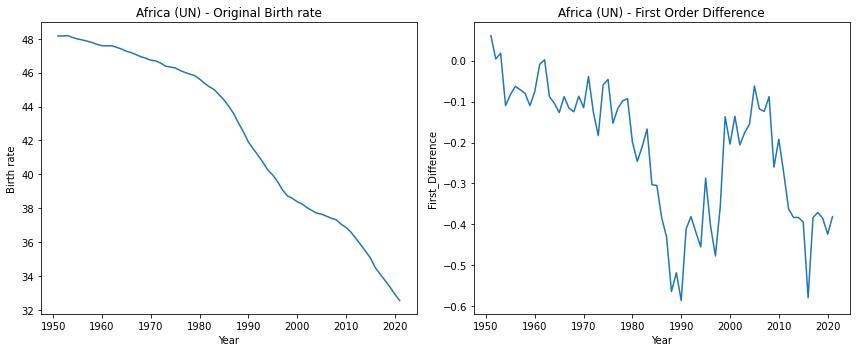

<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



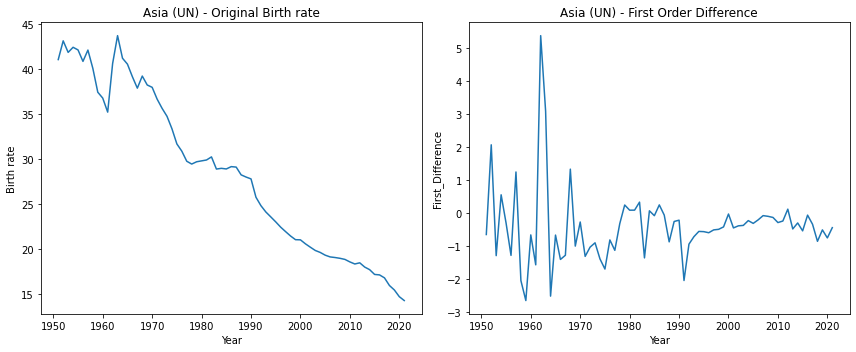

<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



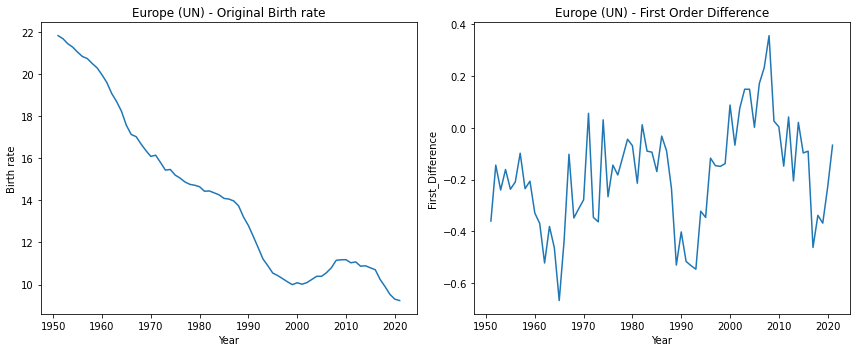

<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



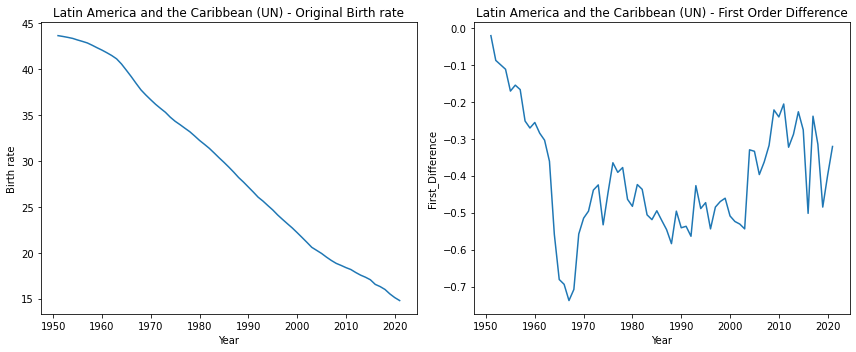

<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



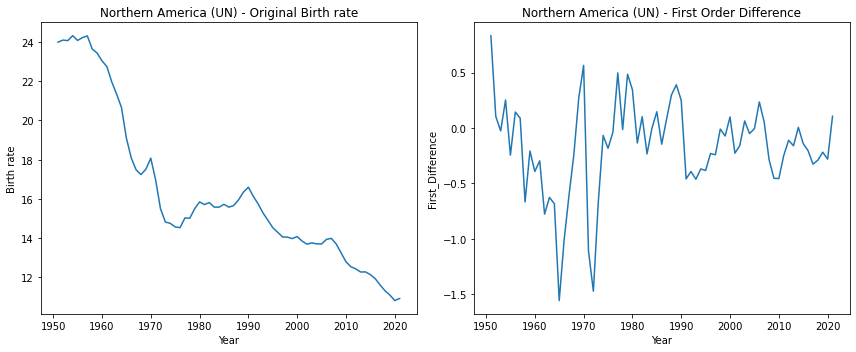

<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



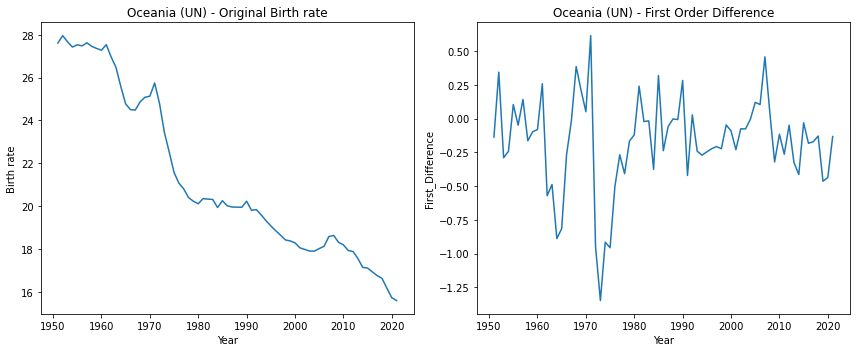

<ipython-input-80-00698991b3dd>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-00698991b3dd>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



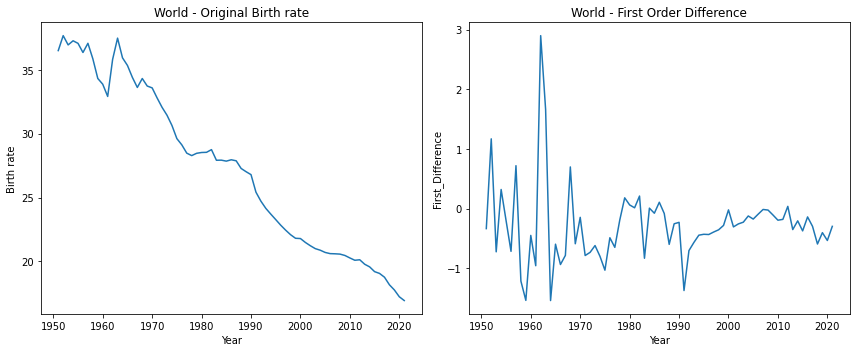

+--------------------------------------+-----------------------+---------------------+---------------------+---------------------+----------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [80]:

def test_and_difference(df):
    continents = [
        'Africa (UN)',
        'Asia (UN)',
        'Europe (UN)',
        'Latin America and the Caribbean (UN)',
        'Northern America (UN)',
        'Oceania (UN)',
        'World'
    ]

    results = []

    for continent_name in continents:
        # Filter the data for the specified continent
        df_continent = df[df['Continent'] == continent_name]
        
        # Perform the ADF test
        result = adfuller(df_continent['Birth rate'])
        result_dict = {
            'Continent': continent_name,
            'ADF Statistic': result[0],
            'P-value': result[1]
        }
        for key, value in result[4].items():
            result_dict[f'Critical Value ({key})'] = value
        
        # Perform first-order normal differencing
        df_continent['First_Difference'] = df_continent['Birth rate'].diff()
        # Drop NaN values resulting from differencing
        df_continent.dropna(inplace=True)
        
        # Append the differenced data for the continent to the results
        result_dict['First_Difference'] = df_continent['First_Difference'].tolist()
        
        results.append(result_dict)

        # Plot the original 'Birth rate' and the first-order differenced 'Birth rate' in a tabulated format
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.lineplot(x=df_continent.index, y='Birth rate', data=df_continent)
        plt.title(f'{continent_name} - Original Birth rate')
        
        plt.subplot(1, 2, 2)
        sns.lineplot(x=df_continent.index, y='First_Difference', data=df_continent)
        plt.title(f'{continent_name} - First Order Difference')
        
        plt.tight_layout()
        plt.show()

    # Print the results in a tabulated format
    print(tabulate(results, headers='keys', tablefmt='pretty'))

# Call the function with your DataFrame 'df1' as an argument
test_and_difference(df1)


In [81]:
def test_stationarity(df):
    continents = [
        'Africa (UN)',
        'Asia (UN)',
        'Europe (UN)',
        'Latin America and the Caribbean (UN)',
        'Northern America (UN)',
        'Oceania (UN)',
        'World'
    ]

    results = []

    for continent_name in continents:
        # Filter the data for the specified continent
        df_continent = df[df['Continent'] == continent_name]

        # Perform first-order normal differencing
        df_continent['First_Difference'] = df_continent['Birth rate'].diff()
        # Drop NaN values resulting from differencing
        df_continent.dropna(inplace=True)

        # Perform the ADF test on the first-order differenced data
        result = adfuller(df_continent['First_Difference'])
        result_dict = {
            'Continent': continent_name,
            'ADF Statistic': result[0],
            'P-value': result[1]
        }
        for key, value in result[4].items():
            result_dict[f'Critical Value ({key})'] = value

        results.append(result_dict)

    # Print the results in a tabulated format
    print(tabulate(results, headers='keys', tablefmt='pretty'))

# Call the function with your DataFrame 'df1' as an argument
test_stationarity(df1)


<ipython-input-81-f48f71a4f61f>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-f48f71a4f61f>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-f48f71a4f61f>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-f48f71a4f61f>:27: SettingWithCopyWarning:


A value is trying

+--------------------------------------+---------------------+------------------------+---------------------+---------------------+----------------------+
|              Continent               |    ADF Statistic    |        P-value         | Critical Value (1%) | Critical Value (5%) | Critical Value (10%) |
+--------------------------------------+---------------------+------------------------+---------------------+---------------------+----------------------+
|             Africa (UN)              | -1.7132105099346855 |  0.42431919958073405   | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
|              Asia (UN)               | -6.297149390383363  | 3.483319956776884e-08  | -3.548493559596539  | -2.912836594776334  |  -2.594129155766944  |
|             Europe (UN)              | -2.596919227621594  |  0.09363567365688896   | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
| Latin America and the Caribbean (UN) | -3.099536946078897  |  0.0265

Africa (UN):

ADF Statistic: -1.7132
P-value: 0.4243
Conclusion: The P-value is greater than the significance level (e.g., 0.05), indicating that we fail to reject the null hypothesis of non-stationarity. The data is not stationary after first-order differencing.

Asia (UN):

ADF Statistic: -6.2971
P-value: 3.4833e-08
Conclusion: The P-value is very small, much less than the significance level, providing evidence to reject the null hypothesis. The data is stationary after first-order differencing.

Europe (UN):

ADF Statistic: -2.5969
P-value: 0.0936
Conclusion: The P-value is greater than the significance level, suggesting that we fail to reject the null hypothesis. The data is not stationary after first-order differencing.

Latin America and the Caribbean (UN):

ADF Statistic: -3.0995
P-value: 0.0266
Conclusion: The P-value is less than the significance level, providing evidence to reject the null hypothesis. The data is stationary after first-order differencing.

Northern America (UN):

ADF Statistic: -4.4468
P-value: 0.000245
Conclusion: The P-value is very small, less than the significance level, indicating that we reject the null hypothesis. The data is stationary after first-order differencing.

Oceania (UN):

ADF Statistic: -4.6303
P-value: 0.0001135
Conclusion: The P-value is very small, less than the significance level, suggesting that we reject the null hypothesis. The data is stationary after first-order differencing.

World:

ADF Statistic: -6.0011
P-value: 1.6565e-07
Conclusion: The P-value is very small, less than the significance level, providing evidence to reject the null hypothesis. The data is stationary after first-order differencing.

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:35: SettingWithCopyWarning:


A value is trying

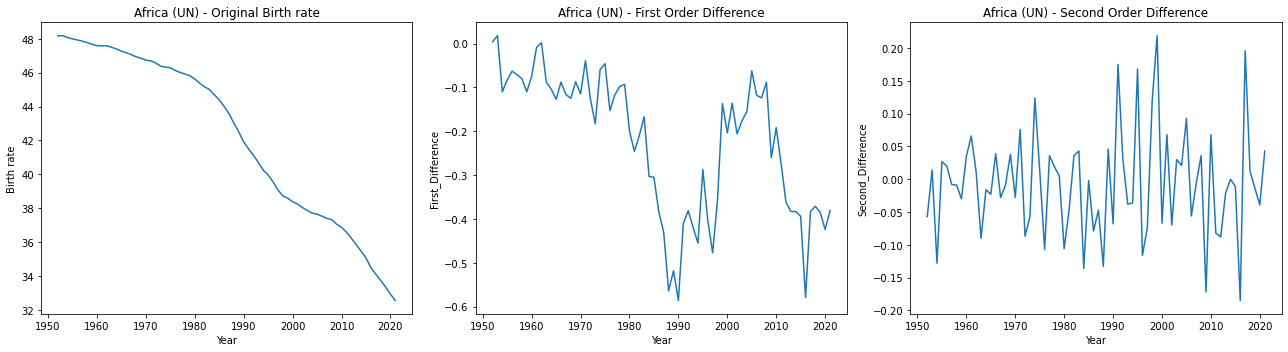

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



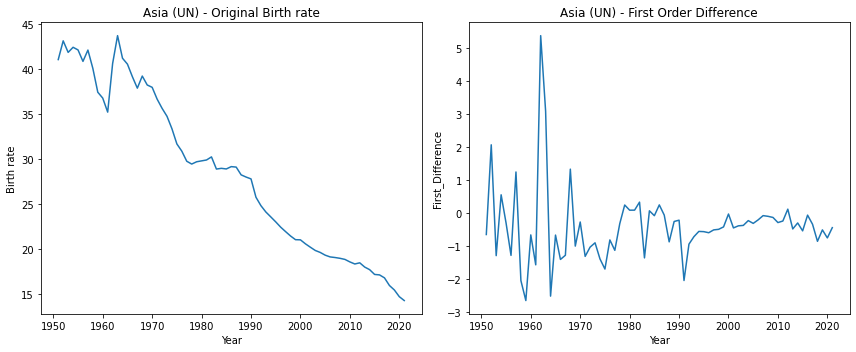

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:35: SettingWithCopyWarning:


A value is trying

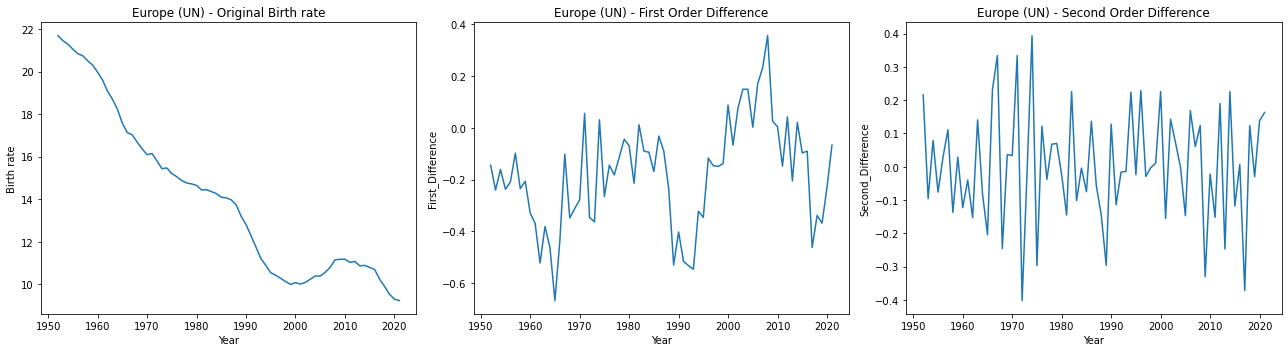

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



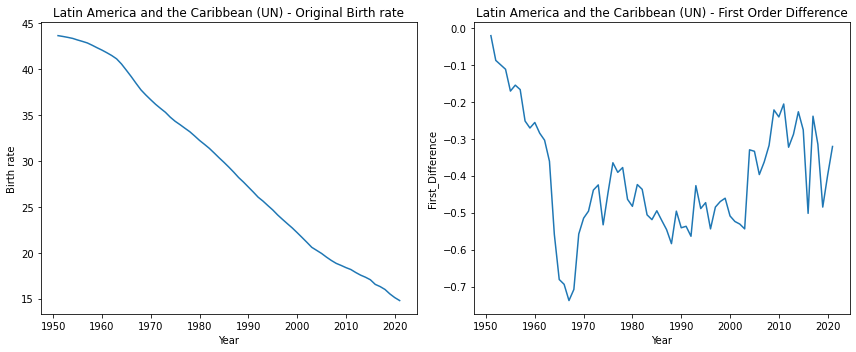

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



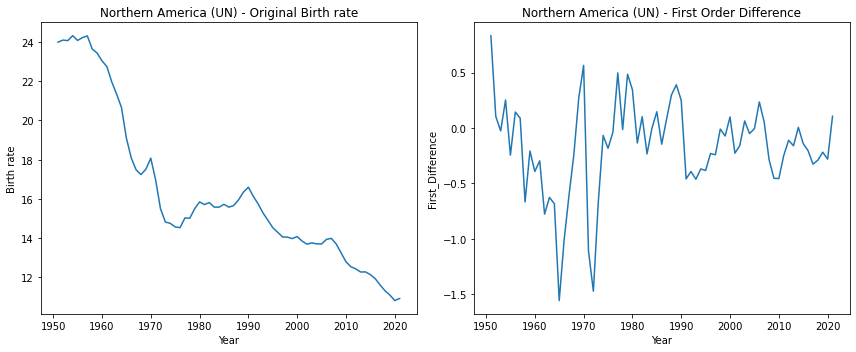

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



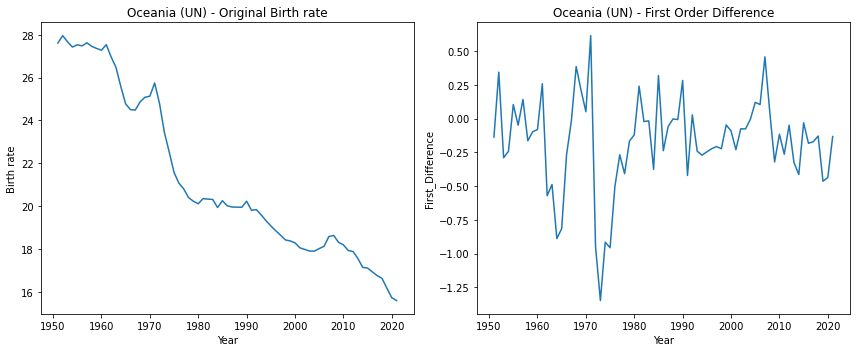

<ipython-input-82-8eafcd030ce0>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8eafcd030ce0>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



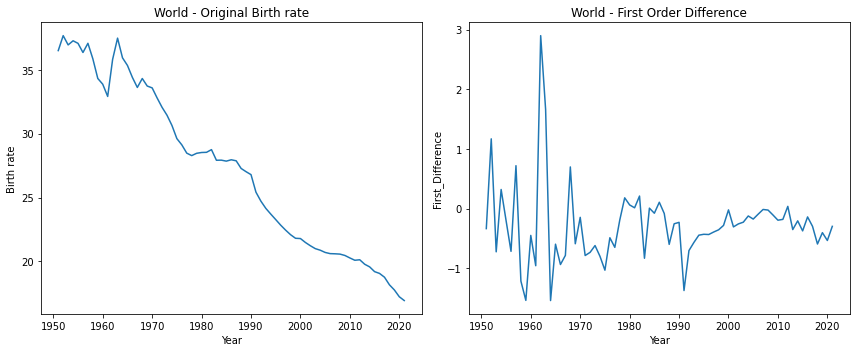

+--------------------------------------+---------------------+------------------------+---------------------+---------------------+----------------------+
|              Continent               |    ADF Statistic    |        P-value         | Critical Value (1%) | Critical Value (5%) | Critical Value (10%) |
+--------------------------------------+---------------------+------------------------+---------------------+---------------------+----------------------+
|             Africa (UN)              | -3.6603191630275385 |  0.004707213674081878  | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
|              Asia (UN)               | -6.297149390383363  | 3.483319956776884e-08  | -3.548493559596539  | -2.912836594776334  |  -2.594129155766944  |
|             Europe (UN)              | -3.651540586979143  |  0.004848778287469438  | -3.5335601309235605 | -2.9064436883991434 |  -2.590723948576676  |
| Latin America and the Caribbean (UN) | -3.099536946078897  |  0.0265

In [82]:
def test_and_difference(df):
    continents = [
        'Africa (UN)',
        'Asia (UN)',
        'Europe (UN)',
        'Latin America and the Caribbean (UN)',
        'Northern America (UN)',
        'Oceania (UN)',
        'World'
    ]

    results = []

    for continent_name in continents:
        # Filter the data for the specified continent
        df_continent = df[df['Continent'] == continent_name]

        # Perform first-order normal differencing
        df_continent['First_Difference'] = df_continent['Birth rate'].diff()
        # Drop NaN values resulting from first differencing
        df_continent.dropna(inplace=True)

        # Check if first-order differencing achieved stationarity
        result = adfuller(df_continent['First_Difference'])
        if result[1] > 0.05:  # If the P-value is greater than 0.05, first differencing did not achieve stationarity
            # Perform second-order normal differencing
            df_continent['Second_Difference'] = df_continent['First_Difference'].diff()
            # Drop NaN values resulting from second differencing
            df_continent.dropna(inplace=True)

            # Perform the ADF test on the second-order differenced data
            result = adfuller(df_continent['Second_Difference'])
            result_dict = {
                'Continent': continent_name,
                'ADF Statistic': result[0],
                'P-value': result[1]
            }
            for key, value in result[4].items():
                result_dict[f'Critical Value ({key})'] = value

            results.append(result_dict)

            # Plot the original 'Birth rate', first-order differenced, and second-order differenced 'Birth rate' in a tabulated format
            plt.figure(figsize=(18, 5))
            plt.subplot(1, 3, 1)
            sns.lineplot(x=df_continent.index, y='Birth rate', data=df_continent)
            plt.title(f'{continent_name} - Original Birth rate')

            plt.subplot(1, 3, 2)
            sns.lineplot(x=df_continent.index, y='First_Difference', data=df_continent)
            plt.title(f'{continent_name} - First Order Difference')

            plt.subplot(1, 3, 3)
            sns.lineplot(x=df_continent.index, y='Second_Difference', data=df_continent)
            plt.title(f'{continent_name} - Second Order Difference')

            plt.tight_layout()
            plt.show()

        else:  # If first differencing achieved stationarity, add the result without second differencing
            result_dict = {
                'Continent': continent_name,
                'ADF Statistic': result[0],
                'P-value': result[1]
            }
            for key, value in result[4].items():
                result_dict[f'Critical Value ({key})'] = value

            results.append(result_dict)

            # Plot the original 'Birth rate' and first-order differenced 'Birth rate' in a tabulated format
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.lineplot(x=df_continent.index, y='Birth rate', data=df_continent)
            plt.title(f'{continent_name} - Original Birth rate')

            plt.subplot(1, 2, 2)
            sns.lineplot(x=df_continent.index, y='First_Difference', data=df_continent)
            plt.title(f'{continent_name} - First Order Difference')

            plt.tight_layout()
            plt.show()

    # Print the results in a tabulated format
    print(tabulate(results, headers='keys', tablefmt='pretty'))

# Call the function with your DataFrame 'df1' as an argument
test_and_difference(df1)


In [83]:


# Apply Box-Cox transformation to stabilize variance
df1['Birth rate_boxcox'], lambda_val = stats.boxcox(df1['Birth rate'])

# Print the optimal lambda value for future reference
print("Optimal lambda value:", lambda_val)


Optimal lambda value: 0.08212793687017583


Optimal lambda value: 0.08212793687017583


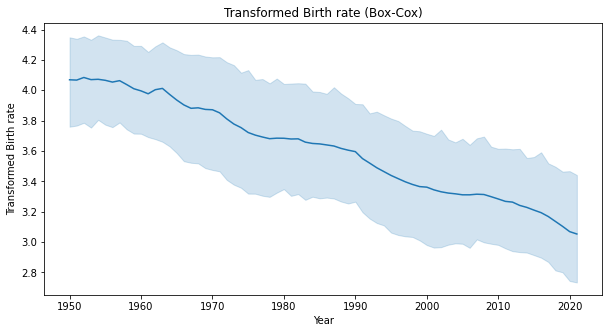

Stationarity Test for Transformed Birth rate:
ADF Statistic: -2.7300578738816768
P-value: 0.068979797517853
Critical Values:
1%: -3.4434175660489905
5%: -2.8673031724657454
10%: -2.5698395516760275


In [84]:
# Apply Box-Cox transformation to stabilize variance
df['Birth rate_boxcox'], lambda_val = stats.boxcox(df['Birth rate'])

# Print the optimal lambda value for future reference
print("Optimal lambda value:", lambda_val)

# Function to test stationarity using the ADF test
def test_stationarity(data):
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("P-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

# Plot the transformed 'Birth rate_boxcox' column
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y='Birth rate_boxcox', data=df)
plt.title("Transformed Birth rate (Box-Cox)")
plt.xlabel("Year")
plt.ylabel("Transformed Birth rate")
plt.show()

# Test stationarity using the ADF test on the transformed data
print("Stationarity Test for Transformed Birth rate:")
test_stationarity(df['Birth rate_boxcox'])


Continent: Africa (UN), Optimal lambda value: 3.3334735120334327


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



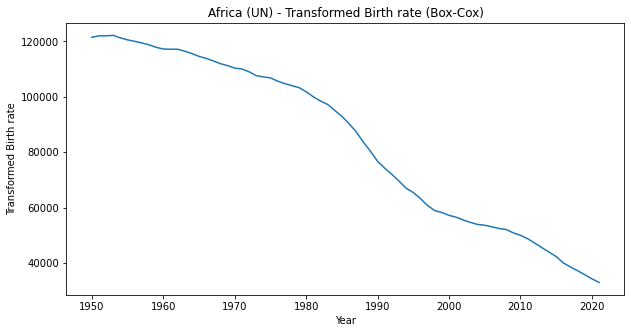

Stationarity Test for Africa (UN) - Transformed Birth rate:
ADF Statistic: 0.004934826567509954
P-value: 0.9589382950413539
Critical Values:
1%: -3.5335601309235605
5%: -2.9064436883991434
10%: -2.590723948576676


Continent: Asia (UN), Optimal lambda value: 0.3783340836831248


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



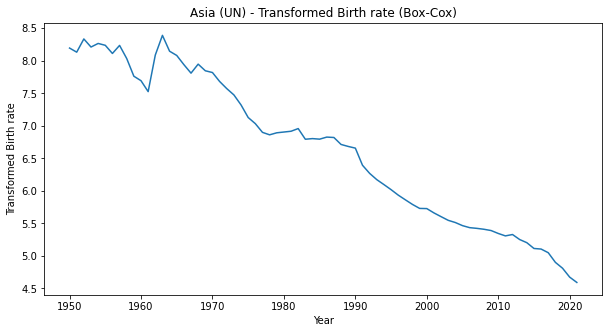

Stationarity Test for Asia (UN) - Transformed Birth rate:
ADF Statistic: 0.7398399962485431
P-value: 0.9906003141968356
Critical Values:
1%: -3.5443688564814813
5%: -2.9110731481481484
10%: -2.5931902777777776


Continent: Europe (UN), Optimal lambda value: -0.7111393108188226


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



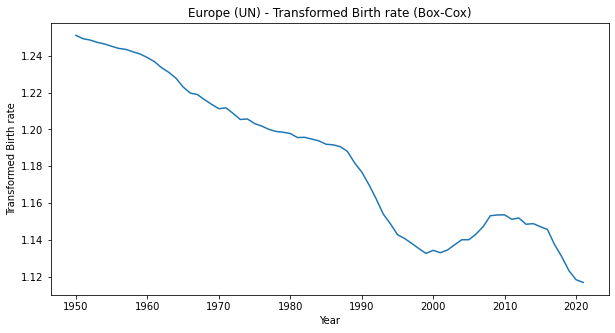

Stationarity Test for Europe (UN) - Transformed Birth rate:
ADF Statistic: -1.2451966157306489
P-value: 0.6538575595366165
Critical Values:
1%: -3.542412746661615
5%: -2.910236235808284
10%: -2.5927445767266866


Continent: Latin America and the Caribbean (UN), Optimal lambda value: 0.5770503387207782


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



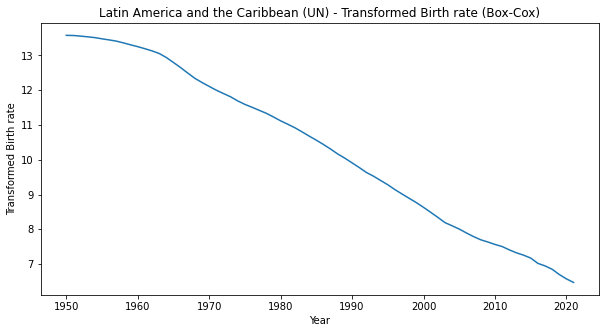

Stationarity Test for Latin America and the Caribbean (UN) - Transformed Birth rate:
ADF Statistic: 0.3540710549154559
P-value: 0.9796936841489449
Critical Values:
1%: -3.53692771987915
5%: -2.907887369384766
10%: -2.591493291015625


Continent: Northern America (UN), Optimal lambda value: -1.1325657634022719


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



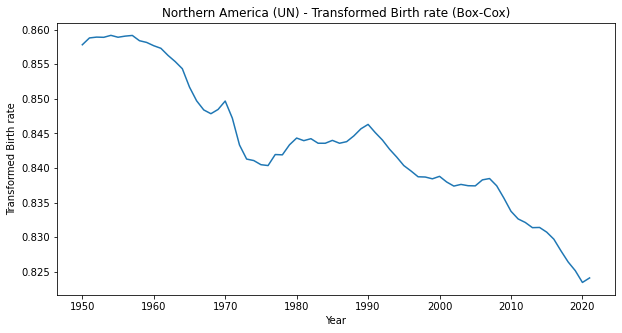

Stationarity Test for Northern America (UN) - Transformed Birth rate:
ADF Statistic: -0.46086260651763133
P-value: 0.8994302882603782
Critical Values:
1%: -3.528889992207215
5%: -2.9044395987933362
10%: -2.589655654274312


Continent: Oceania (UN), Optimal lambda value: -1.3000899214182111


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



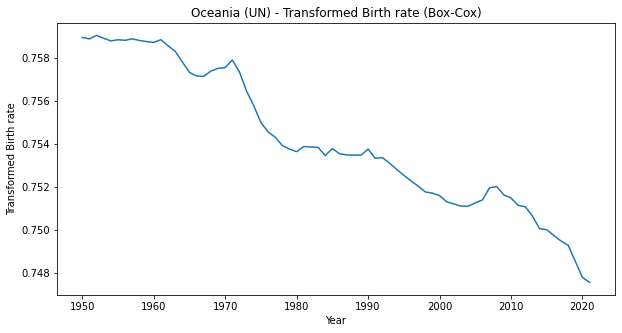

Stationarity Test for Oceania (UN) - Transformed Birth rate:
ADF Statistic: 0.24329523646947504
P-value: 0.9745879877128802
Critical Values:
1%: -3.5274258688046647
5%: -2.903810816326531
10%: -2.5893204081632653


Continent: World, Optimal lambda value: 0.3678269732535332


<ipython-input-85-5549bbda9617>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



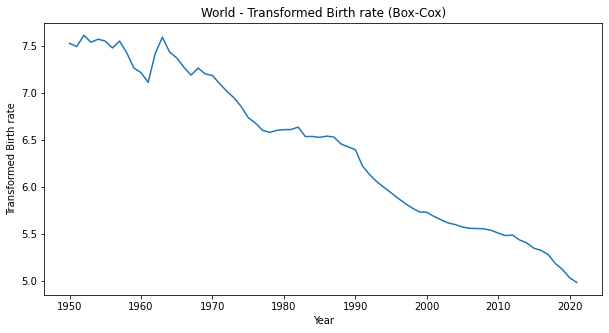

Stationarity Test for World - Transformed Birth rate:
ADF Statistic: 0.5410401806884262
P-value: 0.9860685207943154
Critical Values:
1%: -3.5443688564814813
5%: -2.9110731481481484
10%: -2.5931902777777776




In [85]:
# And it has a 'Year' index, 'Continent' column, and 'Birth rate' column.

# Function to apply Box-Cox transformation and test stationarity for individual continents
def process_continent_data(df, continent_name):
    # Filter the data for the specified continent
    df_continent = df[df['Continent'] == continent_name]
    
    # Apply Box-Cox transformation to stabilize variance
    df_continent['Birth rate_boxcox'], lambda_val = stats.boxcox(df_continent['Birth rate'])
    
    # Print the optimal lambda value for future reference
    print(f"Continent: {continent_name}, Optimal lambda value: {lambda_val}")
    
    # Plot the transformed 'Birth rate_boxcox' column
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df_continent.index, y='Birth rate_boxcox', data=df_continent)
    plt.title(f"{continent_name} - Transformed Birth rate (Box-Cox)")
    plt.xlabel("Year")
    plt.ylabel("Transformed Birth rate")
    plt.show()
    
    # Test stationarity using the ADF test on the transformed data
    print(f"Stationarity Test for {continent_name} - Transformed Birth rate:")
    test_stationarity(df_continent['Birth rate_boxcox'])
    print("\n")

# List of continents
continents = [
    'Africa (UN)',
    'Asia (UN)',
    'Europe (UN)',
    'Latin America and the Caribbean (UN)',
    'Northern America (UN)',
    'Oceania (UN)',
    'World'
]

# Process data for each individual continent
for continent_name in continents:
    process_continent_data(df, continent_name)


In [86]:

def find_optimal_order(df, continent_name):
    # Filter the data for the specified continent
    df_continent = df[df['Continent'] == continent_name]
    
    # Find optimal ARIMA order using auto_arima
    model = auto_arima(df_continent['Birth rate'], seasonal=False, stepwise=True, suppress_warnings=True, trace=True)
    optimal_order = model.order

    print(f"Optimal ARIMA Order for {continent_name}: {optimal_order}")

# Loop through each continent and find the optimal ARIMA order
for continent_name in continents:
    find_optimal_order(df1, continent_name)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-153.366, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-150.680, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-152.554, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-153.765, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-152.247, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-151.871, Time=0.25 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-151.949, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-150.007, Time=0.31 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-154.887, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-152.965, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-153.027, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-153.869, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-151.085, Time=0.19 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 2.018 seconds
Optimal ARIMA Order fo

In [87]:

def fit_arima_model(df, continent_name, order):
    # Filter the data for the specified continent
    df_continent = df[df['Continent'] == continent_name]
    
    # Create ARIMA model
    model = sm.tsa.ARIMA(df_continent['Birth rate'], order=order)
    
    # Fit the model
    results = model.fit()
    
    return results

# Store the ARIMA models for each continent
arima_models = {}

# Define the optimal orders obtained for each continent
optimal_orders = {
    'Africa (UN)': (0, 2, 1),
    'Asia (UN)': (0, 1, 2),
    'Europe (UN)': (2, 1, 0),
    'Latin America and the Caribbean (UN)': (1, 1, 0),
    'Northern America (UN)': (0, 1, 1),
    'Oceania (UN)': (2, 1, 2),
    'World': (0, 1, 2)
}

# Loop through each continent and fit the ARIMA model with the optimal order
for continent_name, order in optimal_orders.items():
    # Fit the ARIMA model
    arima_model = fit_arima_model(df1, continent_name, order)
    
    # Store the model in the dictionary
    arima_models[continent_name] = arima_model

# You can now access each ARIMA model using the continent name as the key
# For example, to get the ARIMA model for Africa (UN):
# arima_model_africa = arima_models['Africa (UN)']


C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmode

In [88]:
# Loop through each continent and print the summary of the ARIMA model
for continent_name, arima_model in arima_models.items():
    print(f"Summary for {continent_name}:")
    print(arima_model.summary())
    print("\n")


Summary for Africa (UN):
                               SARIMAX Results                                
Dep. Variable:             Birth rate   No. Observations:                   72
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  79.443
Date:                Mon, 24 Jul 2023   AIC                           -154.887
Time:                        13:55:53   BIC                           -150.390
Sample:                    01-01-1950   HQIC                          -153.101
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2751      0.121     -2.269      0.023      -0.513      -0.037
sigma2         0.0060      0.001      6.841      0.000       0.004       0.008
Ljung-Box (L1) (Q):        

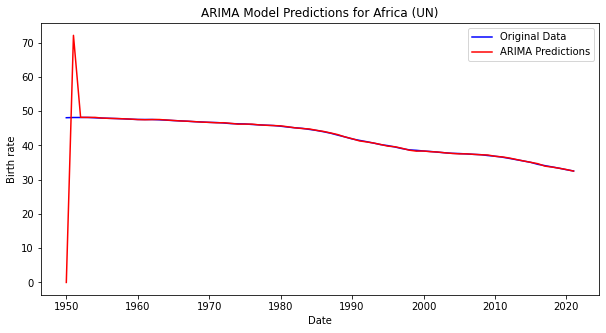

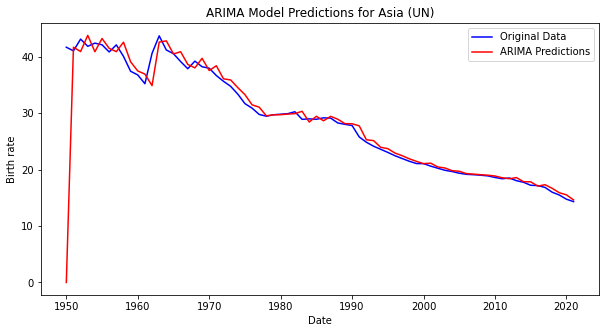

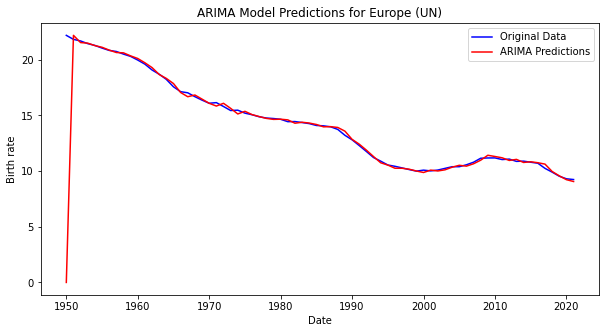

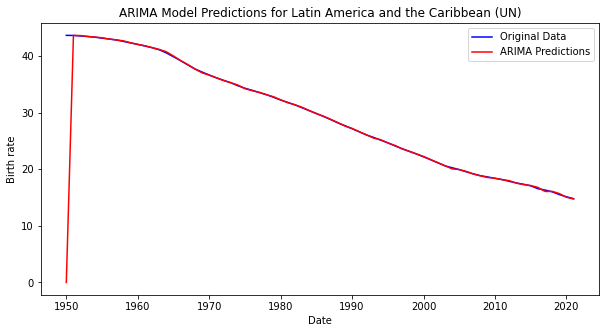

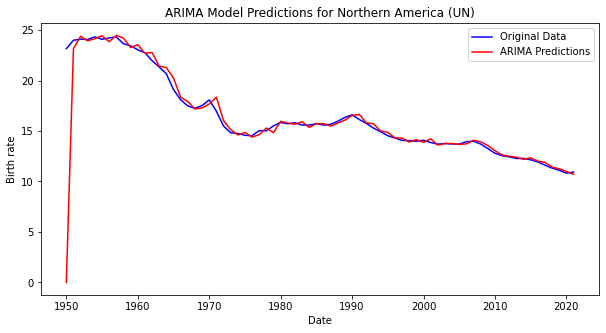

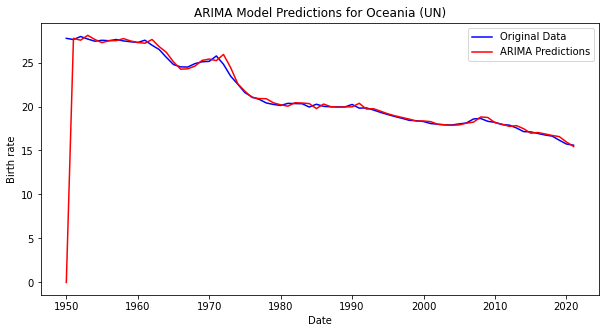

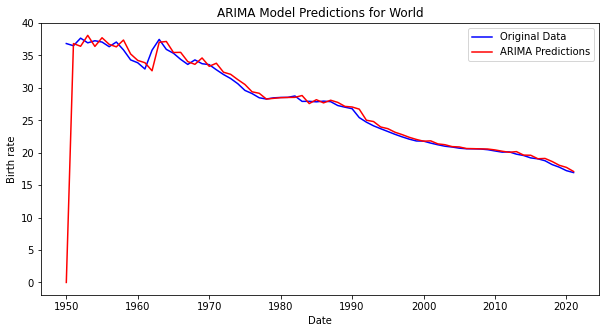

In [89]:
# Loop through each continent and visualize the ARIMA model predictions
for continent_name, arima_model in arima_models.items():
    # Make predictions using the ARIMA model
    predictions = arima_model.predict(typ='levels')
    
    # Plot the original time series data
    plt.figure(figsize=(10, 5))
    plt.plot(df[df['Continent'] == continent_name].index, df[df['Continent'] == continent_name]['Birth rate'], label='Original Data', color='blue')
    
    # Plot the predicted values
    plt.plot(df[df['Continent'] == continent_name].index, predictions, label='ARIMA Predictions', color='red')
    
    plt.title(f'ARIMA Model Predictions for {continent_name}')
    plt.xlabel('Date')
    plt.ylabel('Birth rate')
    plt.legend()
    plt.show()


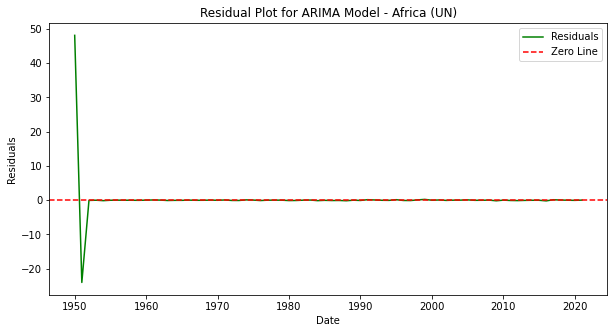

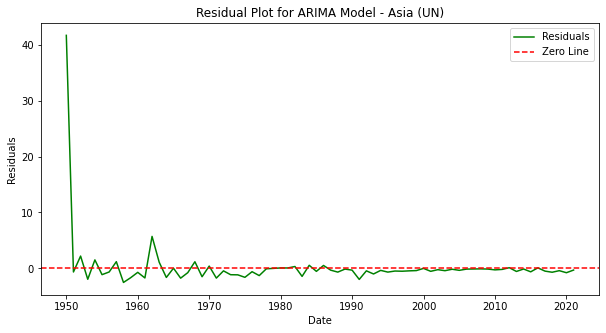

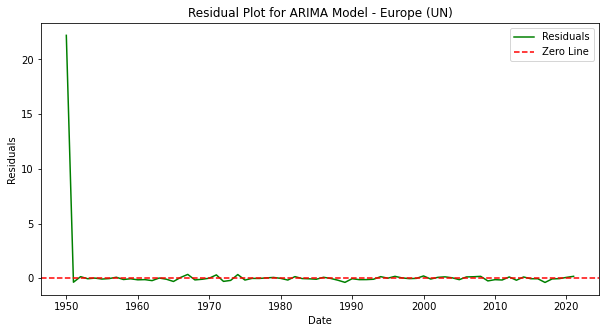

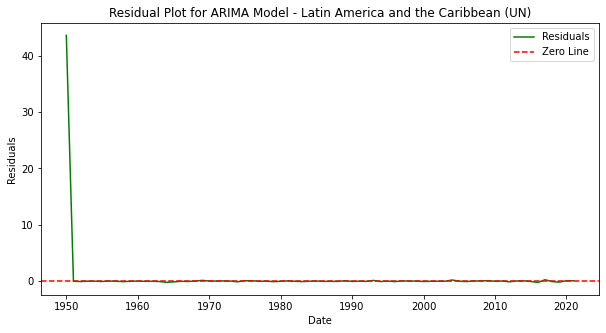

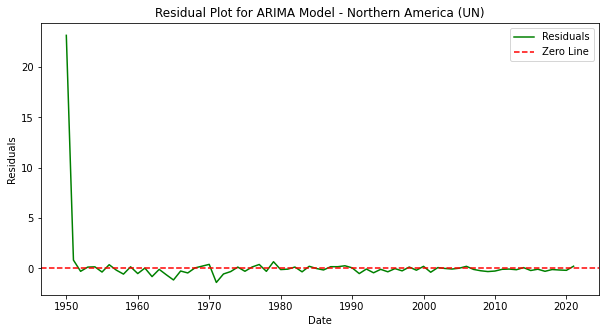

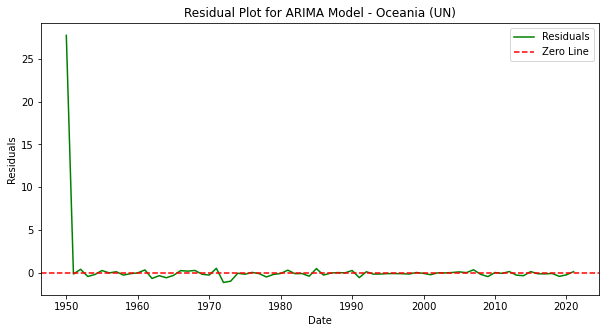

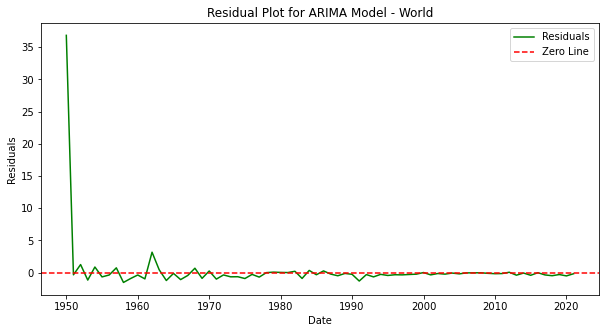

In [90]:

# Loop through each continent and visualize the residual plots
for continent_name, arima_model in arima_models.items():
    # Make predictions using the ARIMA model
    predictions = arima_model.predict(typ='levels')
    
    # Calculate the residuals by subtracting the predicted values from the actual values
    residuals = df[df['Continent'] == continent_name]['Birth rate'] - predictions
    
    # Plot the residuals over time
    plt.figure(figsize=(10, 5))
    plt.plot(df[df['Continent'] == continent_name].index, residuals, label='Residuals', color='green')
    
    plt.title(f'Residual Plot for ARIMA Model - {continent_name}')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
    plt.legend()
    plt.show()


In [91]:

# Dictionary to store the residuals for each continent
residuals_dict = {}

# Loop through each continent and calculate the residuals
for continent_name, arima_model in arima_models.items():
    # Make predictions using the ARIMA model
    predictions = arima_model.predict(typ='levels')
    
    # Calculate the residuals by subtracting the predicted values from the actual values
    residuals = df[df['Continent'] == continent_name]['Birth rate'] - predictions
    
    # Store the residuals in the dictionary
    residuals_dict[continent_name] = residuals

# Create a DataFrame to display the numerical values of the residuals
residuals_df = pd.DataFrame(residuals_dict)

# Display the DataFrame
print("Residuals for each continent:")
print(residuals_df)


Residuals for each continent:
            Africa (UN)  Asia (UN)  Europe (UN)  \
Year                                              
1950-01-01    48.102000  41.678000    22.189000   
1951-01-01   -23.990000  -0.639012    -0.360001   
1952-01-01    -0.057000   2.205797     0.145041   
1953-01-01    -0.000579  -1.943783    -0.044185   
1954-01-01    -0.128159   1.521384     0.015714   
...                 ...        ...          ...   
2017-01-01     0.143974  -0.485105    -0.381621   
2018-01-01     0.051613  -0.685756    -0.059258   
2019-01-01     0.000201  -0.405588    -0.034067   
2020-01-01    -0.038945  -0.770650     0.079423   
2021-01-01     0.032285  -0.296664     0.177829   

            Latin America and the Caribbean (UN)  Northern America (UN)  \
Year                                                                      
1950-01-01                             43.625000              23.157000   
1951-01-01                             -0.021006               0.832998   
1952-0

In [92]:
residuals_df

,Africa (UN),Asia (UN),Europe (UN),Latin America and the Caribbean (UN),Northern America (UN),Oceania (UN),World
Year,,,,,,,
1950-01-01,48.102000,41.678000,22.189000,43.625000,23.157000,27.749000,36.837000
1951-01-01,-23.990000,-0.639012,-0.360001,-0.021006,0.832998,-0.137002,-0.335005
1952-01-01,-0.057000,2.205797,0.145041,-0.067488,-0.280254,0.416973,1.255068
1953-01-01,-0.000579,-1.943783,-0.044185,-0.014044,0.138883,-0.422217,-1.152841
1954-01-01,-0.128159,1.521384,0.015714,-0.014323,0.164757,-0.194943,0.874809
...,...,...,...,...,...,...,...
2017-01-01,0.143974,-0.485105,-0.381621,0.251341,-0.278275,-0.119977,-0.354693
2018-01-01,0.051613,-0.685756,-0.059258,-0.081551,-0.103480,-0.073097,-0.474139
2019-01-01,0.000201,-0.405588,-0.034067,-0.177316,-0.148640,-0.407010,-0.294899


In [93]:

# Dictionary to store evaluation metrics for each continent
evaluation_metrics = {}

# Loop through each continent and calculate the evaluation metrics
for continent_name, arima_model in arima_models.items():
    # Make predictions using the ARIMA model
    predictions = arima_model.predict(typ='levels')
    
    # Extract the actual values for the continent
    actual_values = df[df['Continent'] == continent_name]['Birth rate']
    
    # Calculate the residuals by subtracting the predicted values from the actual values
    residuals = actual_values - predictions
    
    # Calculate evaluation metrics
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(residuals / actual_values)) * 100
    
    # Store the evaluation metrics in the dictionary
    evaluation_metrics[continent_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

# Create a DataFrame to display the evaluation metrics
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print("Model Evaluation Metrics for each continent:")
print(evaluation_df)


Model Evaluation Metrics for each continent:
      Africa (UN)  Asia (UN)  Europe (UN)  \
MAE      1.058673   1.353241     0.428736   
MSE     40.135358  25.438198     6.862161   
RMSE     6.335247   5.043629     2.619573   
MAPE     2.220865   3.895536     2.287933   

      Latin America and the Caribbean (UN)  Northern America (UN)  \
MAE                               0.663248               0.583253   
MSE                              26.438761               7.578220   
RMSE                              5.141864               2.752857   
MAPE                              1.628126               2.960989   

      Oceania (UN)      World  
MAE       0.606292   0.978496  
MSE      10.787619  19.300026  
RMSE      3.284451   4.393179  
MAPE      2.407496   2.985237  


In [122]:
# Dictionary to store evaluation metrics for each continent
evaluation_metrics = {}

# Loop through each continent and calculate the evaluation metrics
for continent_name, arima_model in arima_models.items():
    # Make predictions using the ARIMA model
    predictions = arima_model.predict(typ='levels')
    
    # Extract the actual values for the continent
    actual_values = df[df['Continent'] == continent_name]['Birth rate']
    
    # Calculate the residuals by subtracting the predicted values from the actual values
    residuals = actual_values - predictions
    
    # Calculate evaluation metrics
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(residuals / actual_values)) * 100
    
    # Store the evaluation metrics in the dictionary
    evaluation_metrics[continent_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

# Create a DataFrame to display the evaluation metrics
evaluation_df = pd.DataFrame(evaluation_metrics).T  # Transpose the DataFrame

# Set the name of the index to 'Continent'
evaluation_df.index.name = 'Continent'

# Display the DataFrame without the redundant "Continent" column
print("Model Evaluation Metrics for each continent:")
print(evaluation_df.to_string())


Model Evaluation Metrics for each continent:
                                           MAE        MSE      RMSE      MAPE
Continent                                                                    
Africa (UN)                           1.058673  40.135358  6.335247  2.220865
Asia (UN)                             1.353241  25.438198  5.043629  3.895536
Europe (UN)                           0.428736   6.862161  2.619573  2.287933
Latin America and the Caribbean (UN)  0.663248  26.438761  5.141864  1.628126
Northern America (UN)                 0.583253   7.578220  2.752857  2.960989
Oceania (UN)                          0.606292  10.787619  3.284451  2.407496
World                                 0.978496  19.300026  4.393179  2.985237


In [123]:
evaluation_df

,MAE,MSE,RMSE,MAPE
Continent,,,,
Africa (UN),1.058673,40.135358,6.335247,2.220865
Asia (UN),1.353241,25.438198,5.043629,3.895536
Europe (UN),0.428736,6.862161,2.619573,2.287933
Latin America and the Caribbean (UN),0.663248,26.438761,5.141864,1.628126
Northern America (UN),0.583253,7.578220,2.752857,2.960989
Oceania (UN),0.606292,10.787619,3.284451,2.407496
World,0.978496,19.300026,4.393179,2.985237


In [95]:

# Dictionary to store forecasts for each continent
forecasts = {}

# Number of future time points to forecast
forecast_periods = 5

# Loop through each continent and generate forecasts
for continent_name, arima_model in arima_models.items():
    # Generate forecasts for the specified number of future time points
    forecast_values = arima_model.forecast(steps=forecast_periods)
    
    # Create a date range for the forecasted time points
    last_year = df1[df1['Continent'] == continent_name].index[-1]
    forecast_dates = pd.date_range(start=last_year, periods=forecast_periods + 1, freq='A')[1:]
    
    # Store the forecasts in the dictionary
    forecasts[continent_name] = {
        'Forecast Dates': forecast_dates,
        'Forecast Values': forecast_values
    }

# Display the forecasts for each continent
for continent_name, forecast_data in forecasts.items():
    print(f"Forecast for {continent_name} (Next {forecast_periods} Years):")
    forecast_df = pd.DataFrame(forecast_data)
    print(forecast_df.to_string(index=False))
    print("\n")

Forecast for Africa (UN) (Next 5 Years):
Forecast Dates  Forecast Values
    2022-12-31        32.153117
    2023-12-31        31.763234
    2024-12-31        31.373351
    2025-12-31        30.983468
    2026-12-31        30.593586


Forecast for Asia (UN) (Next 5 Years):
Forecast Dates  Forecast Values
    2022-12-31        14.396553
    2023-12-31        14.458958
    2024-12-31        14.458958
    2025-12-31        14.458958
    2026-12-31        14.458958


Forecast for Europe (UN) (Next 5 Years):
Forecast Dates  Forecast Values
    2022-12-31         9.129381
    2023-12-31         9.047186
    2024-12-31         8.966220
    2025-12-31         8.895572
    2026-12-31         8.830893


Forecast for Latin America and the Caribbean (UN) (Next 5 Years):
Forecast Dates  Forecast Values
    2022-12-31        14.482455
    2023-12-31        14.176193
    2024-12-31        13.877044
    2025-12-31        13.584843
    2026-12-31        13.299428


Forecast for Northern America (UN) (N

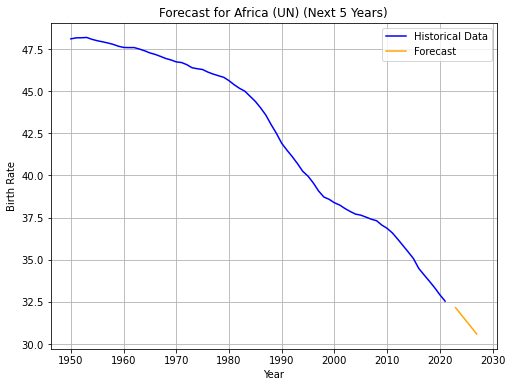

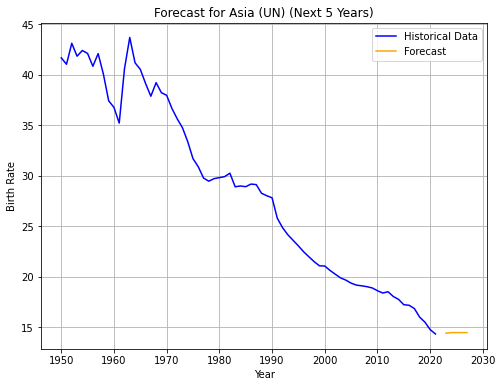

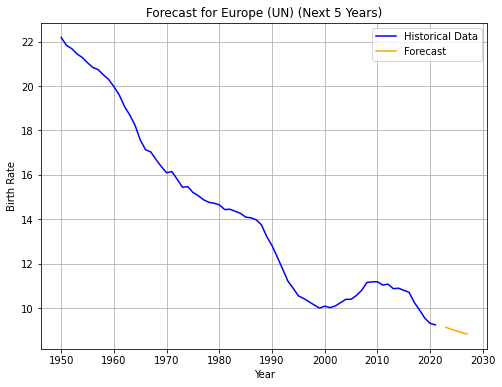

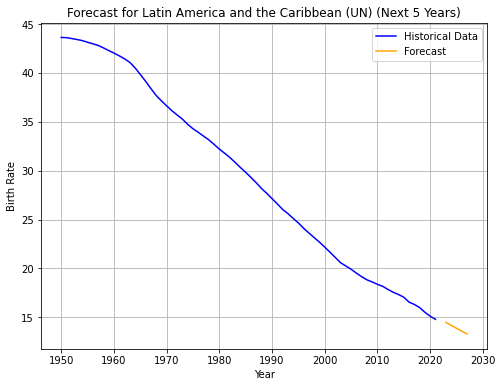

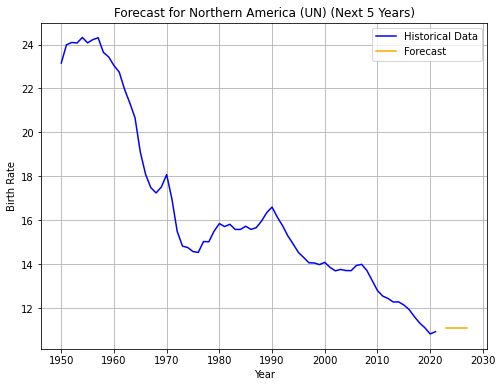

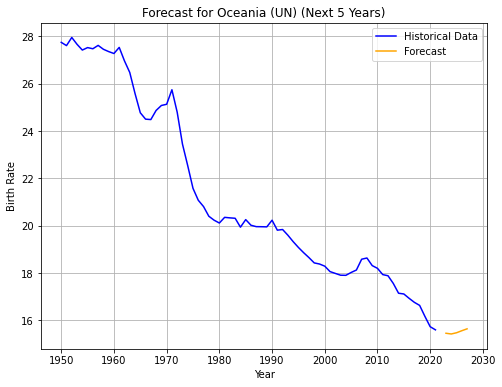

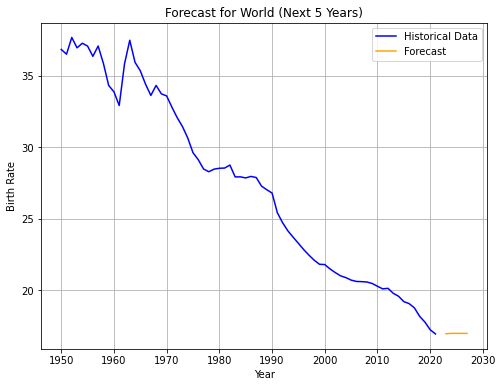

In [96]:
# Visualize the forecasts for each continent
for continent_name, forecast_data in forecasts.items():
    plt.figure(figsize=(8, 6))
    plt.title(f"Forecast for {continent_name} (Next {forecast_periods} Years)")
    
    # Plot historical data
    historical_data = df1[df1['Continent'] == continent_name]['Birth rate']
    plt.plot(historical_data.index, historical_data, label="Historical Data", color='blue')
    
    # Plot forecasted data
    forecast_dates = forecast_data['Forecast Dates']
    forecast_values = forecast_data['Forecast Values']
    plt.plot(forecast_dates, forecast_values, label="Forecast", color='orange')
    
    plt.xlabel("Year")
    plt.ylabel("Birth Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

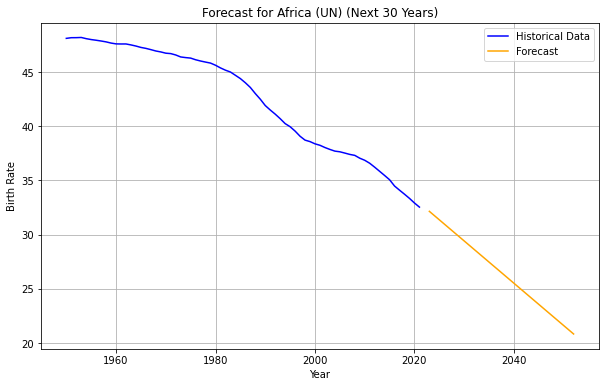

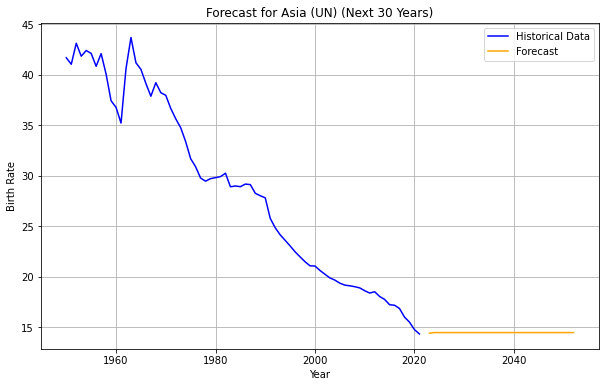

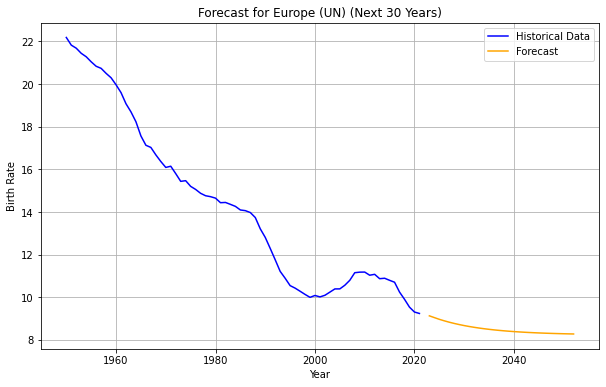

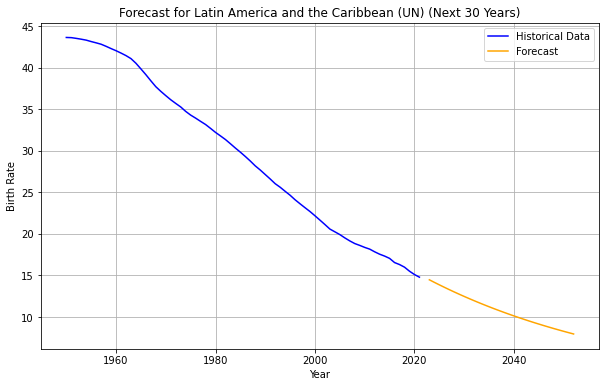

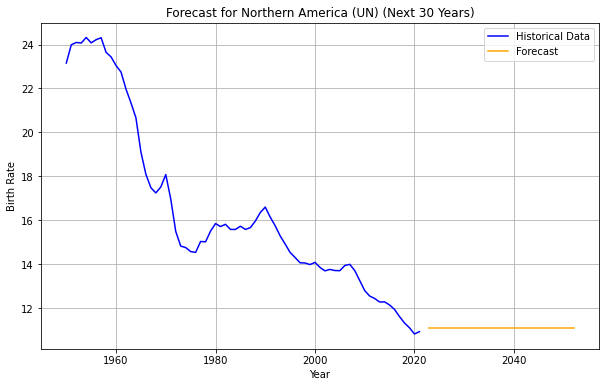

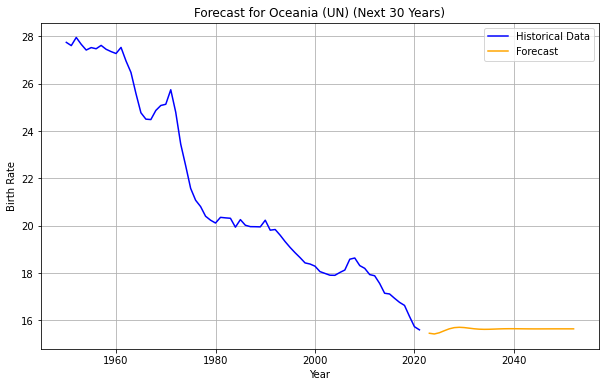

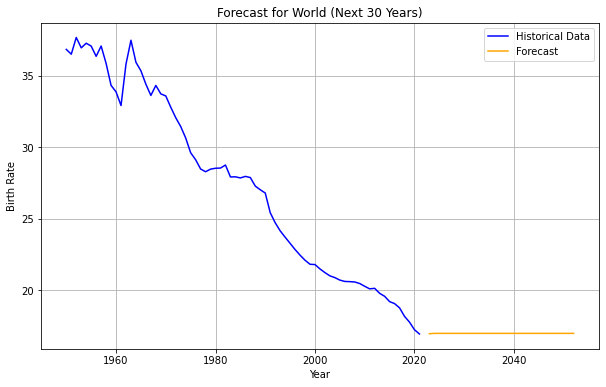

In [97]:
# Dictionary to store forecasts for each continent
forecasts = {}

# Number of future time points to forecast
forecast_periods = 30  # Change this to 30 to forecast for the next 30 years

# Loop through each continent and generate forecasts
for continent_name, arima_model in arima_models.items():
    # Generate forecasts for the specified number of future time points
    forecast_values = arima_model.forecast(steps=forecast_periods)
    
    # Create a date range for the forecasted time points
    last_year = df1[df1['Continent'] == continent_name].index[-1]
    forecast_dates = pd.date_range(start=last_year, periods=forecast_periods + 1, freq='A')[1:]
    
    # Store the forecasts in the dictionary
    forecasts[continent_name] = {
        'Forecast Dates': forecast_dates,
        'Forecast Values': forecast_values
    }

# Visualize the forecasts for each continent
for continent_name, forecast_data in forecasts.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Forecast for {continent_name} (Next {forecast_periods} Years)")
    
    # Plot historical data
    historical_data = df1[df1['Continent'] == continent_name]['Birth rate']
    plt.plot(historical_data.index, historical_data, label="Historical Data", color='blue')
    
    # Plot forecasted data
    forecast_dates = forecast_data['Forecast Dates']
    forecast_values = forecast_data['Forecast Values']
    plt.plot(forecast_dates, forecast_values, label="Forecast", color='orange')
    
    plt.xlabel("Year")
    plt.ylabel("Birth Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

In [98]:

def fit_sarima_model(df, continent_name, order, seasonal_order):
    # Filter the data for the specified continent
    df_continent = df[df['Continent'] == continent_name]
    
    # Create SARIMA model
    model = sm.tsa.SARIMAX(df_continent['Birth rate'], order=order, seasonal_order=seasonal_order)
    
    # Fit the model
    results = model.fit()
    
    return results

# Store the SARIMA models for each continent
sarima_models = {}

# Define the optimal orders obtained for each continent
optimal_orders = {
    'Africa (UN)': (0, 2, 1),
    'Asia (UN)': (0, 1, 2),
    'Europe (UN)': (2, 1, 0),
    'Latin America and the Caribbean (UN)': (1, 1, 0),
    'Northern America (UN)': (0, 1, 1),
    'Oceania (UN)': (2, 1, 2),
    'World': (0, 1, 2)
}

# Define the optimal seasonal orders obtained for each continent
optimal_seasonal_orders = {
    'Africa (UN)': (0, 1, 1, 5),
    'Asia (UN)': (0, 1, 1, 5),
    'Europe (UN)': (2, 1, 0, 5),
    'Latin America and the Caribbean (UN)': (1, 1, 0, 5),
    'Northern America (UN)': (0, 1, 1, 5),
    'Oceania (UN)': (2, 1, 2, 5),
    'World': (0, 1, 2, 5)
}

# Loop through each continent and fit the SARIMA model with the optimal order and seasonal order
for continent_name, order in optimal_orders.items():
    seasonal_order = optimal_seasonal_orders[continent_name]
    
    # Fit the SARIMA model
    sarima_model = fit_sarima_model(df1, continent_name, order, seasonal_order)
    
    # Store the model in the dictionary
    sarima_models[continent_name] = sarima_model



C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmode

In [99]:

# Loop through each continent and print the summary of the SARIMA model
for continent_name, sarima_model in sarima_models.items():
    print(f"Summary for {continent_name}:")
    print(sarima_model.summary())
    print("\n")


Summary for Africa (UN):
                                     SARIMAX Results                                     
Dep. Variable:                        Birth rate   No. Observations:                   72
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 5)   Log Likelihood                  65.341
Date:                           Mon, 24 Jul 2023   AIC                           -124.681
Time:                                   13:56:05   BIC                           -118.158
Sample:                               01-01-1950   HQIC                          -122.107
                                    - 01-01-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2914      0.134     -2.171      0.030      -0.554      -0.028
ma.S.L5       -0.9

In [100]:

# Create a DataFrame to store the evaluation metrics for each continent
evaluation_results = pd.DataFrame(columns=['Continent', 'RMSE', 'MAE', 'MSE'])

# Loop through each continent and evaluate the SARIMA model
for continent_name, sarima_model in sarima_models.items():
    # Get the observed data
    observed_data = df1[df1['Continent'] == continent_name]['Birth rate']
    
    # Get the in-sample predictions
    predictions = sarima_model.get_prediction(start=observed_data.index[0], end=observed_data.index[-1])
    predicted_mean = predictions.predicted_mean
    
    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(observed_data, predicted_mean))
    
    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(observed_data, predicted_mean)
    
    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(observed_data, predicted_mean)
    
    # Append the results to the evaluation DataFrame
    evaluation_results = evaluation_results.append({'Continent': continent_name, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}, ignore_index=True)

# Print the evaluation results
print(evaluation_results)


                              Continent      RMSE       MAE        MSE
0                           Africa (UN)  7.156712  1.531957  51.218532
1                             Asia (UN)  5.635801  1.672958  31.762257
2                           Europe (UN)  2.942096  0.611909   8.655926
3  Latin America and the Caribbean (UN)  5.757925  0.983912  33.153705
4                 Northern America (UN)  3.090419  0.766965   9.550688
5                          Oceania (UN)  3.663633  0.807901  13.422208
6                                 World  4.912521  1.235329  24.132862


In [117]:

# Create a DataFrame to store the evaluation metrics for each continent
evaluation_results = pd.DataFrame(columns=['Continent', 'RMSE', 'MAE', 'MSE', 'MAPE'])

# Loop through each continent and evaluate the SARIMA model
for continent_name, sarima_model in sarima_models.items():
    # Get the observed data
    observed_data = df1[df1['Continent'] == continent_name]['Birth rate']
    
    # Get the in-sample predictions
    predictions = sarima_model.get_prediction(start=observed_data.index[0], end=observed_data.index[-1])
    predicted_mean = predictions.predicted_mean
    
    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(observed_data, predicted_mean))
    
    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(observed_data, predicted_mean)
    
    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(observed_data, predicted_mean)
    
    # Calculate the mean absolute percentage error (MAPE)
    mape = np.mean(np.abs((observed_data - predicted_mean) / observed_data)) * 100
    
    # Append the results to the evaluation DataFrame
    evaluation_results = evaluation_results.append({'Continent': continent_name, 'RMSE': rmse, 'MAE': mae, 'MSE': mse, 'MAPE': mape}, ignore_index=True)

# Print the evaluation results
print(evaluation_results)


                              Continent      RMSE       MAE        MSE  \
0                           Africa (UN)  7.156712  1.531957  51.218532   
1                             Asia (UN)  5.635801  1.672958  31.762257   
2                           Europe (UN)  2.942096  0.611909   8.655926   
3  Latin America and the Caribbean (UN)  5.757925  0.983912  33.153705   
4                 Northern America (UN)  3.090419  0.766965   9.550688   
5                          Oceania (UN)  3.663633  0.807901  13.422208   
6                                 World  4.912521  1.235329  24.132862   

       MAPE  
0  3.208402  
1  4.631135  
2  3.251016  
3  2.387547  
4  3.742512  
5  3.151809  
6  3.670905  


In [118]:
evaluation_results

,Continent,RMSE,MAE,MSE,MAPE
0,Africa (UN),7.156712,1.531957,51.218532,3.208402
1,Asia (UN),5.635801,1.672958,31.762257,4.631135
2,Europe (UN),2.942096,0.611909,8.655926,3.251016
3,Latin America and the Caribbean (UN),5.757925,0.983912,33.153705,2.387547
4,Northern America (UN),3.090419,0.766965,9.550688,3.742512
5,Oceania (UN),3.663633,0.807901,13.422208,3.151809
6,World,4.912521,1.235329,24.132862,3.670905


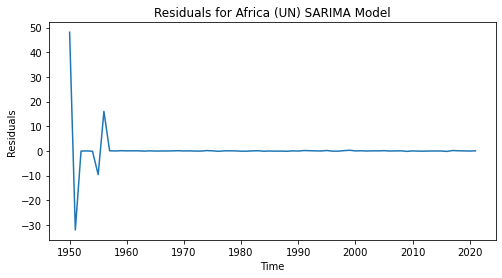

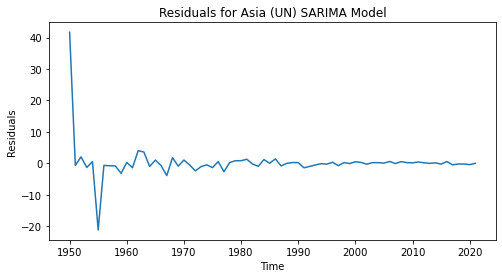

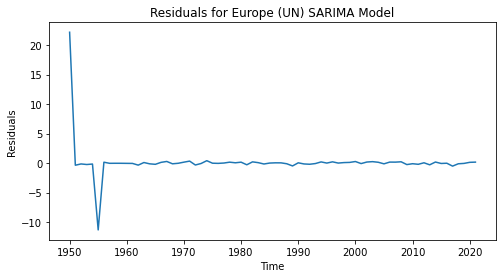

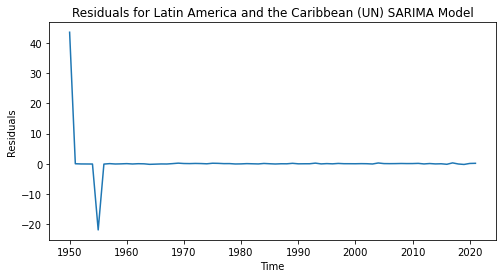

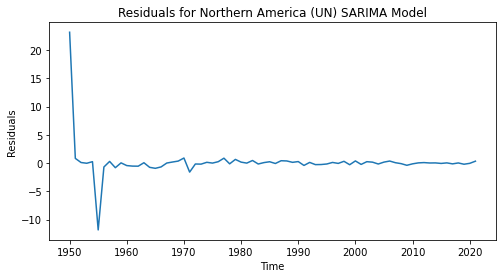

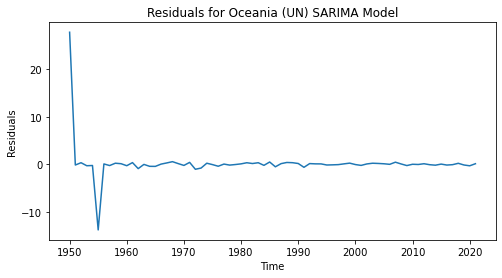

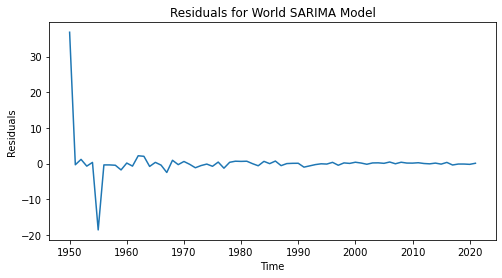

In [102]:

# Plot residuals for each continent's SARIMA model
for continent_name, sarima_model in sarima_models.items():
    # Get the residuals from the SARIMA model
    residuals = sarima_model.resid
    
    # Plot residuals
    plt.figure(figsize=(8, 4))
    plt.plot(residuals)
    plt.title(f"Residuals for {continent_name} SARIMA Model")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()


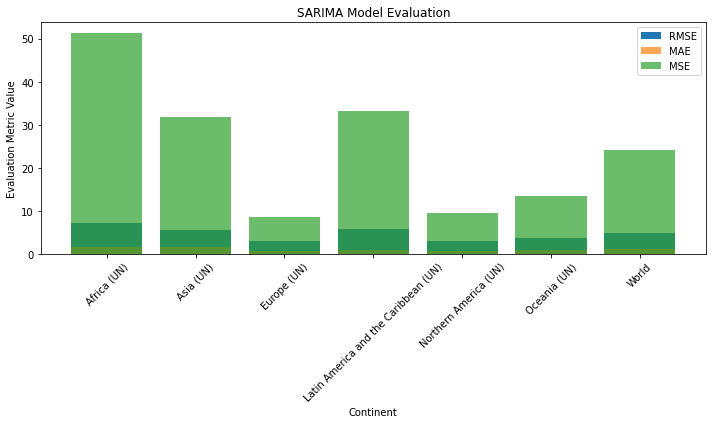

In [103]:

# Plot the evaluation metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis labels to be the continent names
x_labels = evaluation_results['Continent']

# Plot RMSE, MAE, and MSE as bar plots
ax.bar(x_labels, evaluation_results['RMSE'], label='RMSE')
ax.bar(x_labels, evaluation_results['MAE'], label='MAE', alpha=0.7)
ax.bar(x_labels, evaluation_results['MSE'], label='MSE', alpha=0.7)

# Add labels and legend
ax.set_xlabel('Continent')
ax.set_ylabel('Evaluation Metric Value')
ax.set_title('SARIMA Model Evaluation')
ax.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


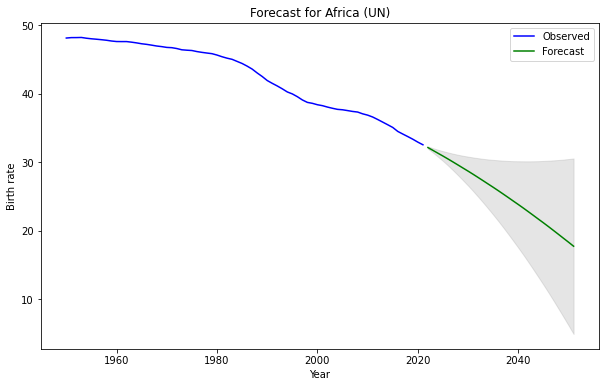

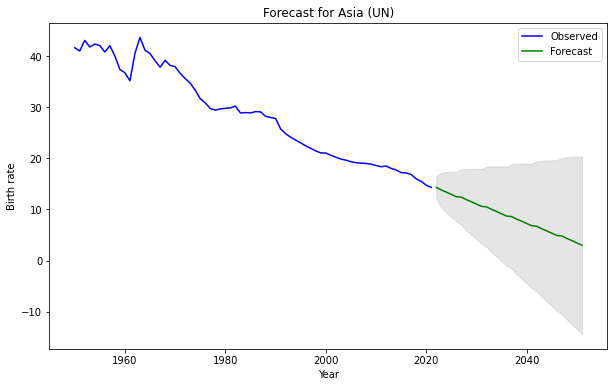

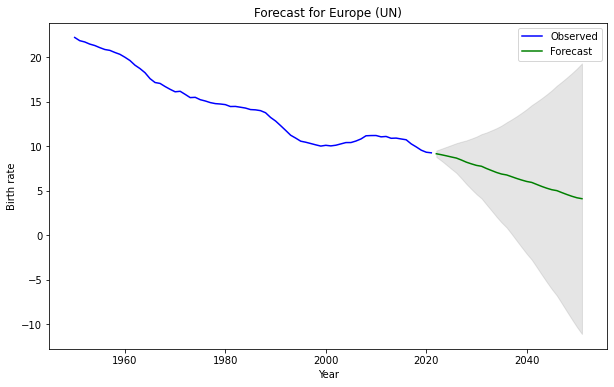

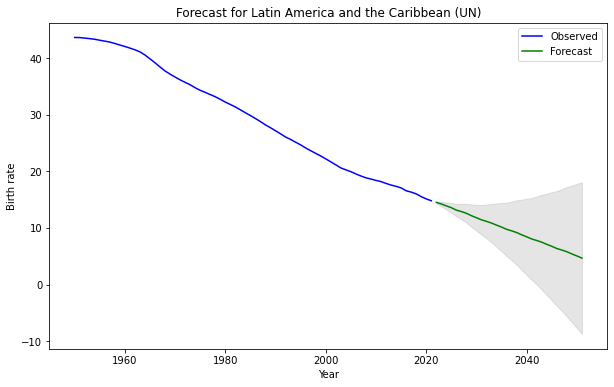

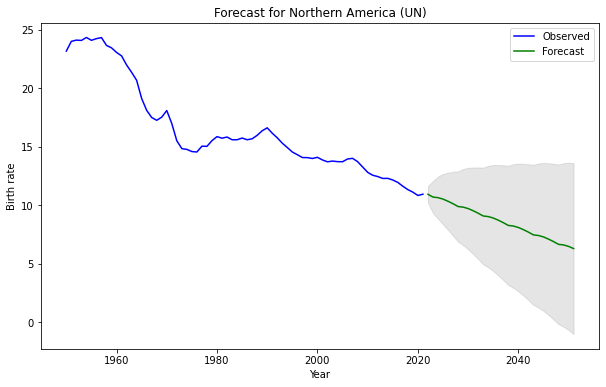

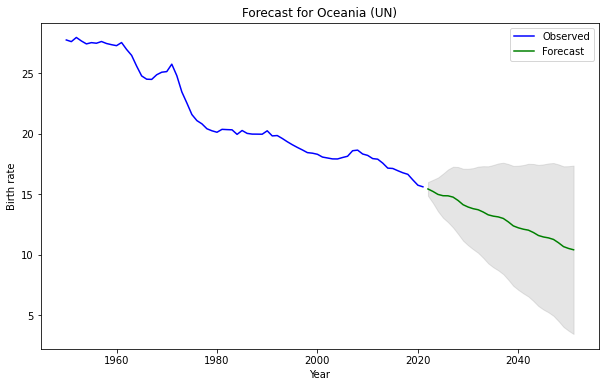

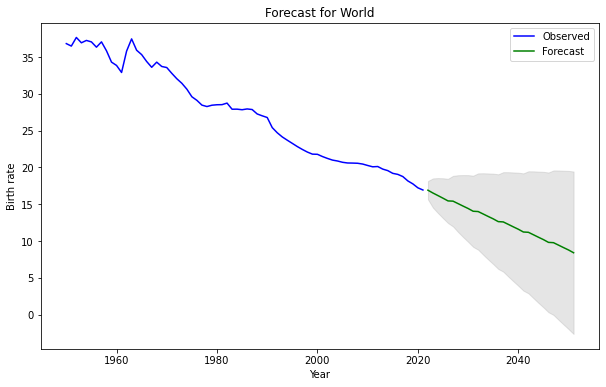

In [104]:

# Loop through each continent and plot the forecast
for continent_name, sarima_model in sarima_models.items():
    # Get the forecasted values and confidence intervals
    forecast = sarima_model.get_forecast(steps=30)  # Forecast for the next 30 years
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    # Get the observed data
    observed_data = df1[df1['Continent'] == continent_name]['Birth rate']
    
    # Create a date range for the forecasted time points
    last_year = df1[df1['Continent'] == continent_name].index[-1]
    forecast_dates = pd.date_range(start=last_year, periods=30, freq='A')
    
    # Plot the observed data
    plt.figure(figsize=(10, 6))
    plt.plot(observed_data.index, observed_data.values, label='Observed', color='blue')
    
    # Plot the forecasted values
    plt.plot(forecast_dates, forecast_values, label='Forecast', color='green')
    
    # Plot the confidence intervals
    plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2)
    
    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Birth rate')
    plt.title(f'Forecast for {continent_name}')
    
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()
